In [1]:
# import librairies

import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime 

end = datetime.today()

start = datetime(end.year-1,end.month,end.day)

In [3]:
cours = 'BTC-EUR'

btc = yf.download(cours, start, end)
btc.head()

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2021-06-04  32349.347656  32349.347656  29476.158203  30322.699219   
2021-06-05  30310.988281  31165.554688  28685.556641  29221.080078   
2021-06-06  29210.107422  29948.041016  29023.330078  29474.392578   
2021-06-07  29452.109375  30251.599609  27464.539062  27526.492188   
2021-06-08  27550.125000  27898.205078  25546.294922  27497.933594   

               Adj Close       Volume  
Date                                   
2021-06-04  30322.699219  34380052740  
2021-06-05  29221.080078  29556026133  
2021-06-06  29474.392578  23763233981  
2021-06-07  27526.492188  27627564851  
2021-06-08  27497.933594  40994783948

<AxesSubplot:>

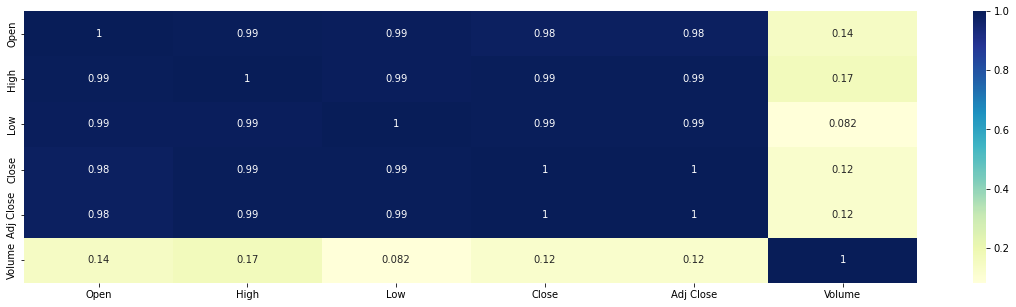

In [4]:
plt.figure(figsize=(20,5)) 
sns.heatmap(btc.corr(),annot = True,cmap="YlGnBu") 

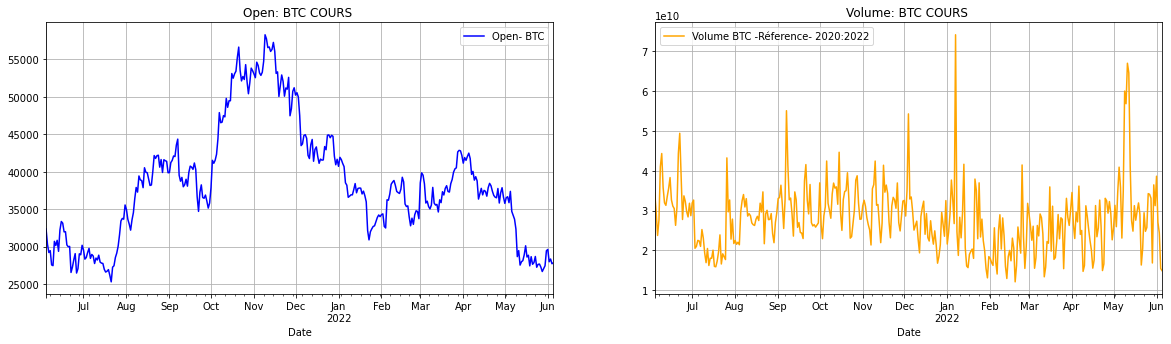

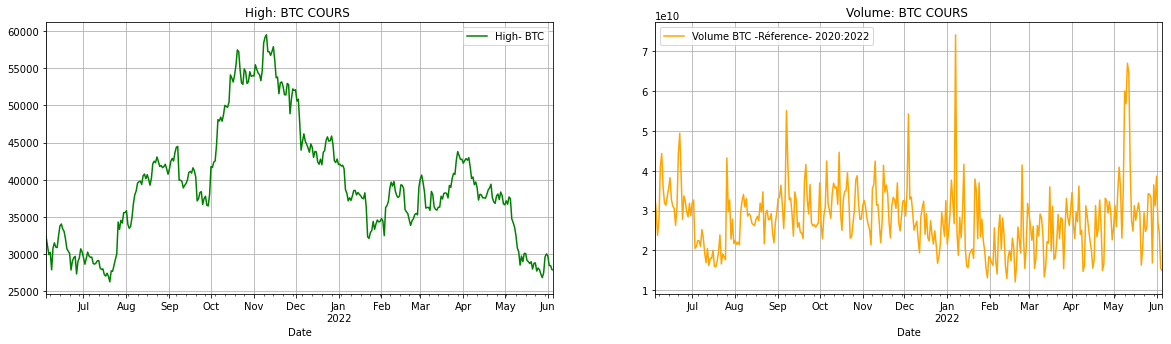

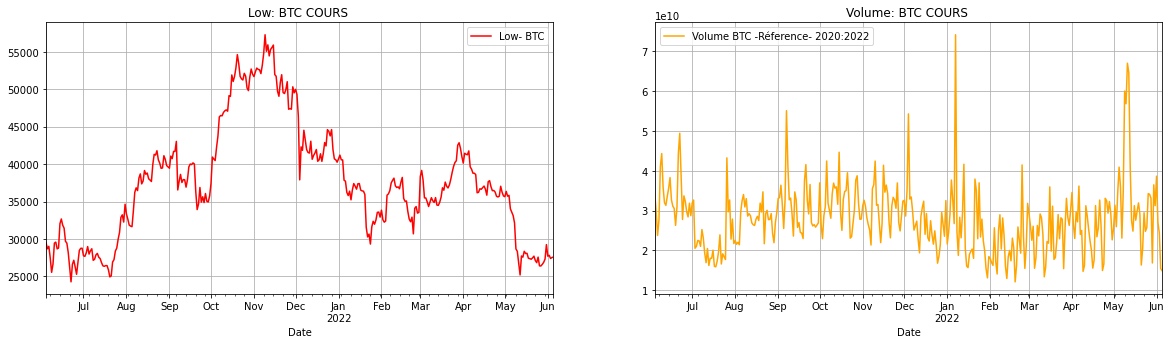

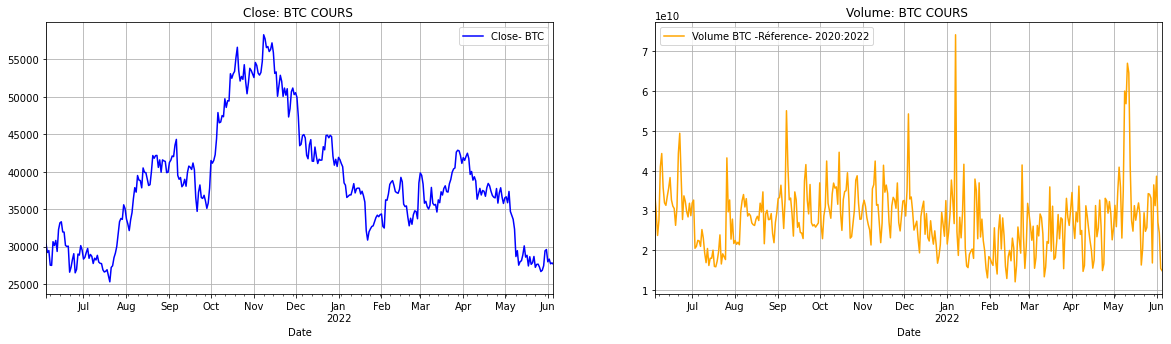

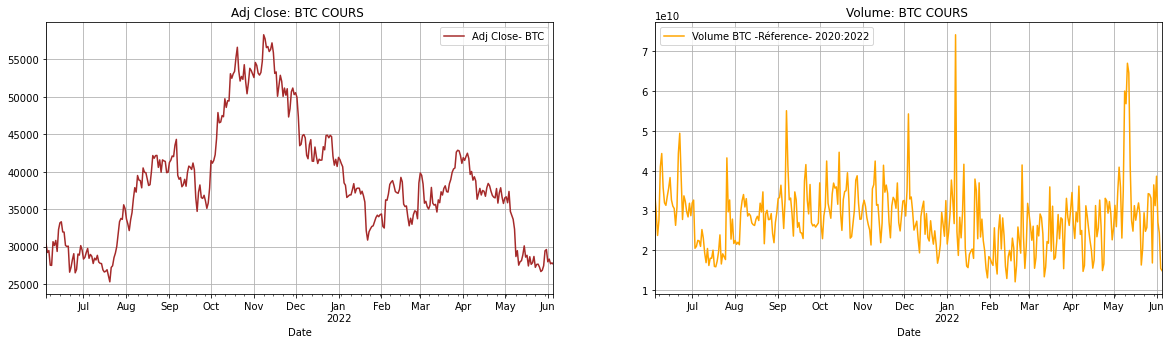

In [5]:
import itertools

color_cycle= itertools.cycle(["blue","green","red","blue","brown","grey","yellow","green"])

for i in btc.columns[:-1]:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(f"{i}: BTC COURS ")
    btc[i].plot(label=f'{i}- BTC',color=next(color_cycle))
   
    #plt.fill_between(btc[i].index,0,btc[i],color=next(color_cycle),alpha=0.6)
    plt.legend()
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.title(f"Volume: BTC COURS ")
    btc['Volume'].plot(label='Volume BTC -Réference- 2020:2022',color='orange')
   
    #plt.fill_between(btc['Volume'].index,0,btc['Volume'],color='grey',alpha=0.6)
    plt.legend()
    plt.grid()

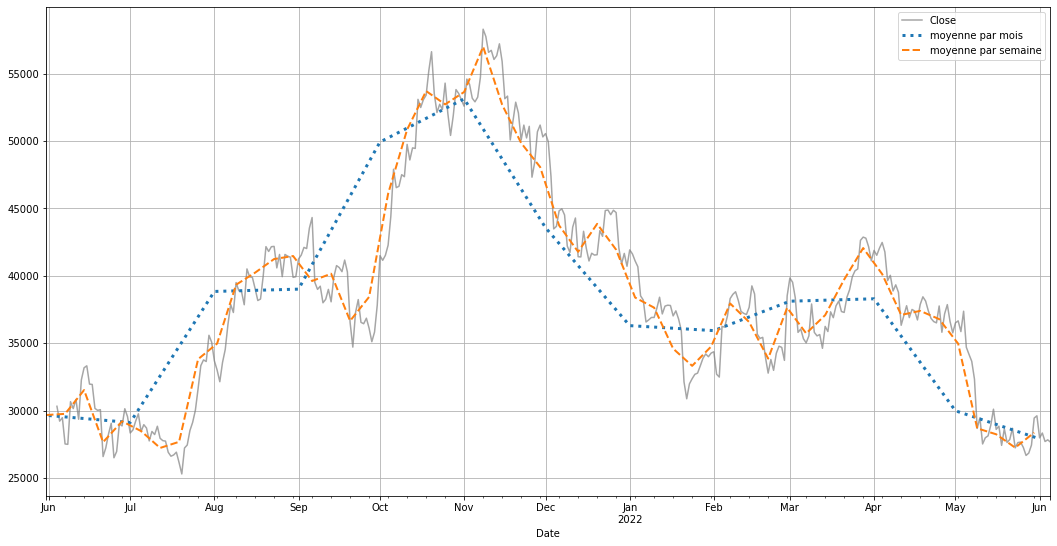

In [6]:
plt.figure(figsize=(18, 9))
btc['Close'].plot(color='gray',alpha=0.7)
btc['Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=1)
btc['Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=1)

plt.legend()
plt.grid()
plt.show()


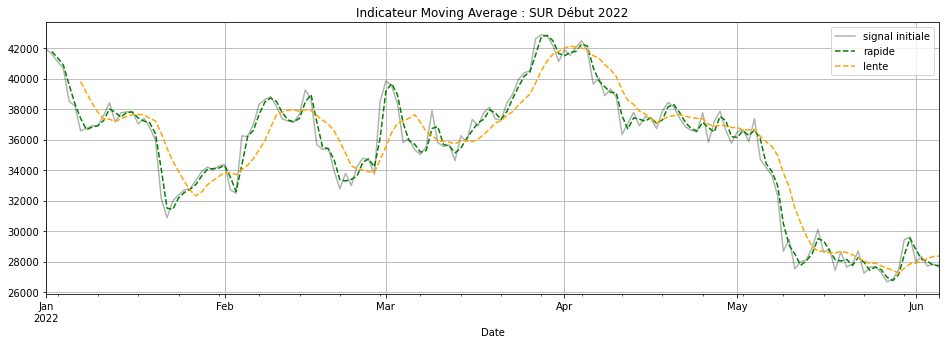

In [7]:
df=btc.copy()

plt.figure(figsize=(16,5))

df.loc["2022" ,"Close"].plot(color="black", label="signal initiale",alpha=0.3)
df.loc["2022" ,"Close"].rolling(window=2).mean().plot(label="rapide",ls='--',color='green')
df.loc["2022" ,"Close"].rolling(window=7).mean().plot(label="lente",ls='--',color='orange')

plt.title('Indicateur Moving Average : SUR Début 2022')
plt.legend()
plt.grid()

/var/folders/5d/6z528s_s09ggzk7142dgylvc0000gn/T/ipykernel_7003/2723421699.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,5))


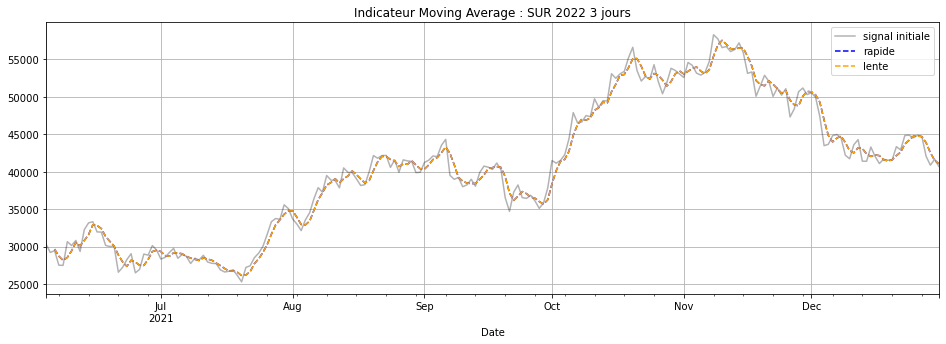

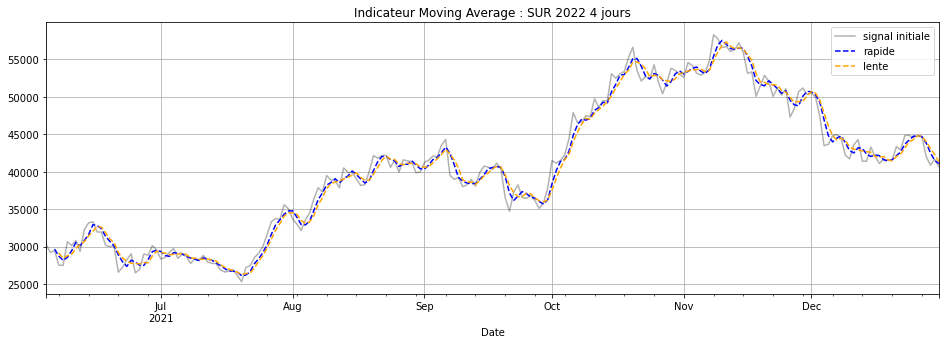

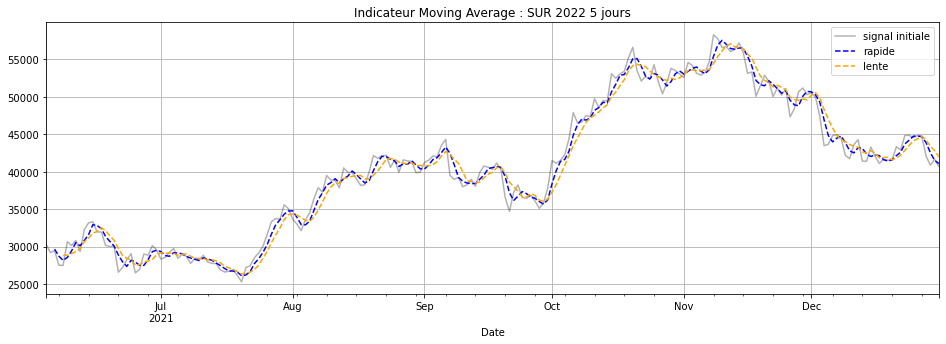

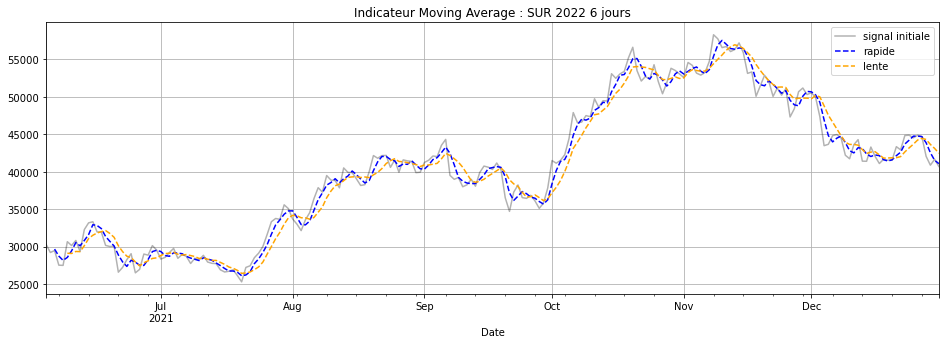

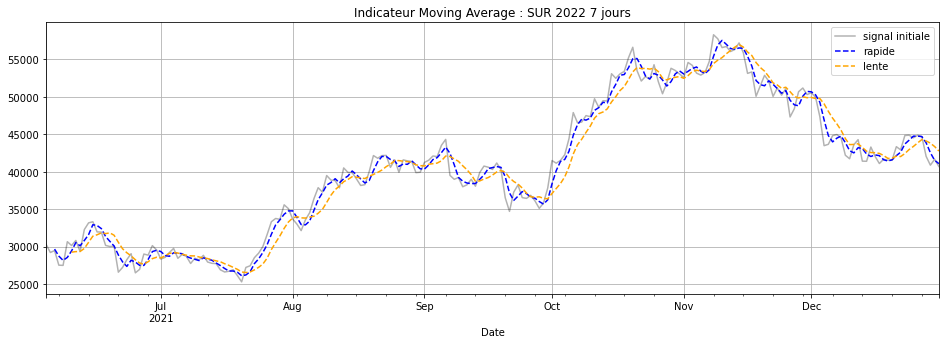

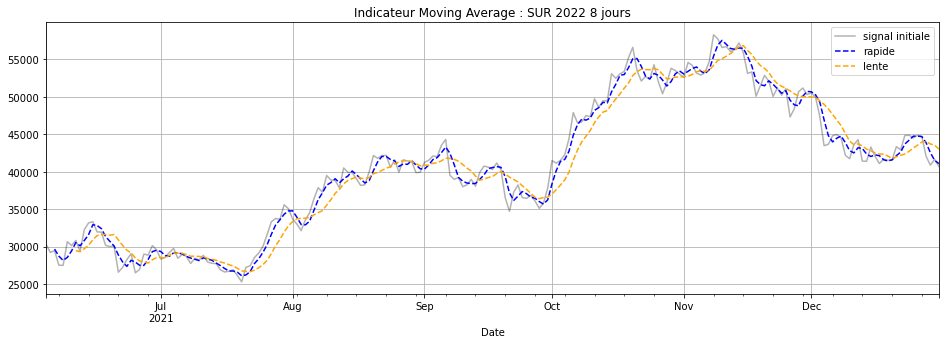

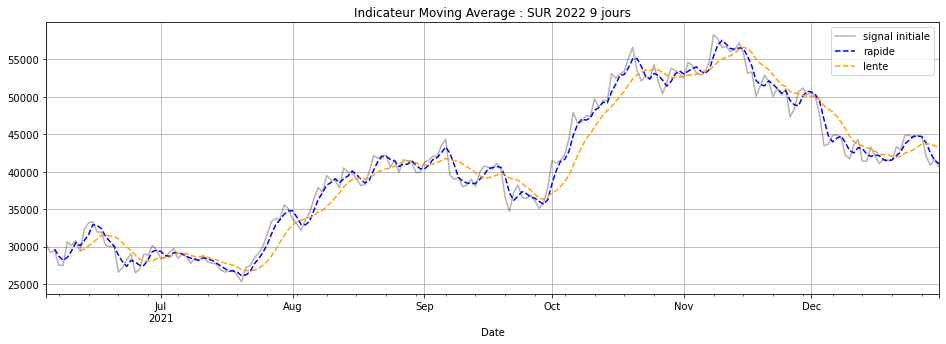

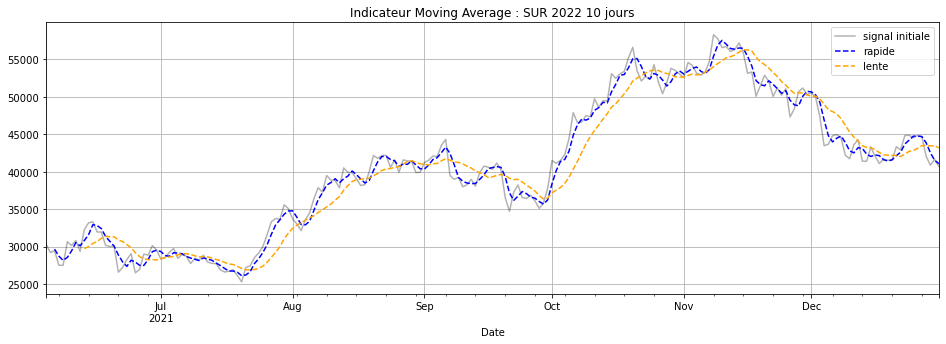

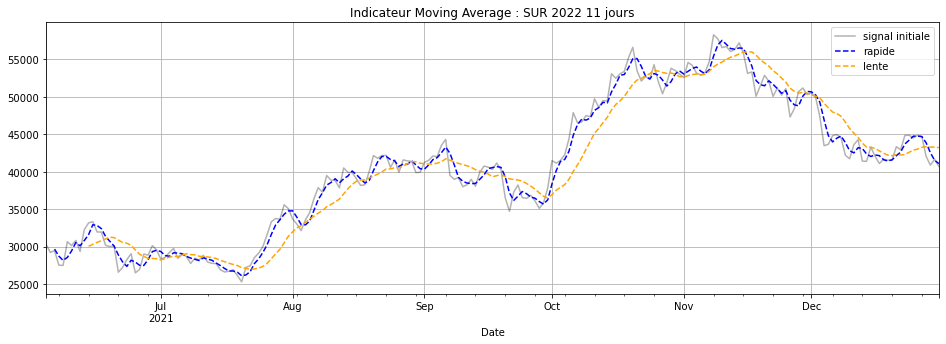

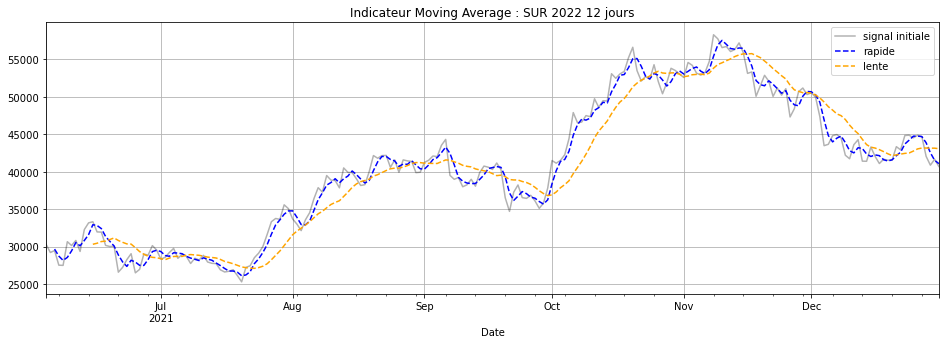

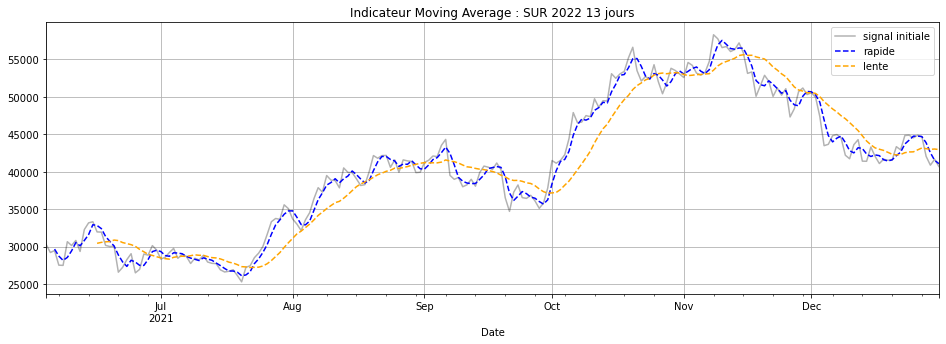

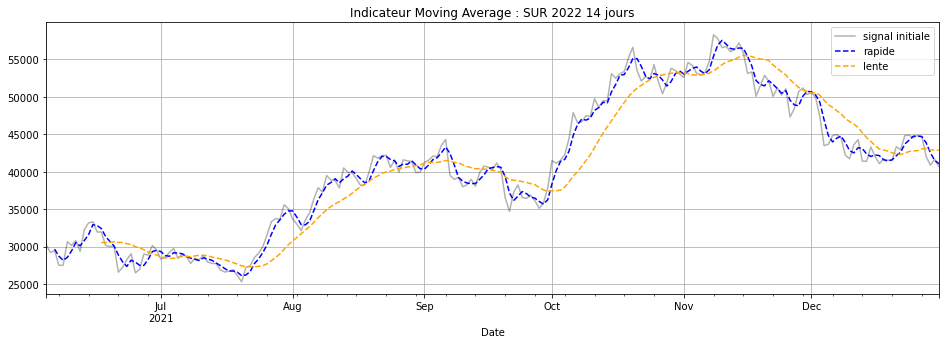

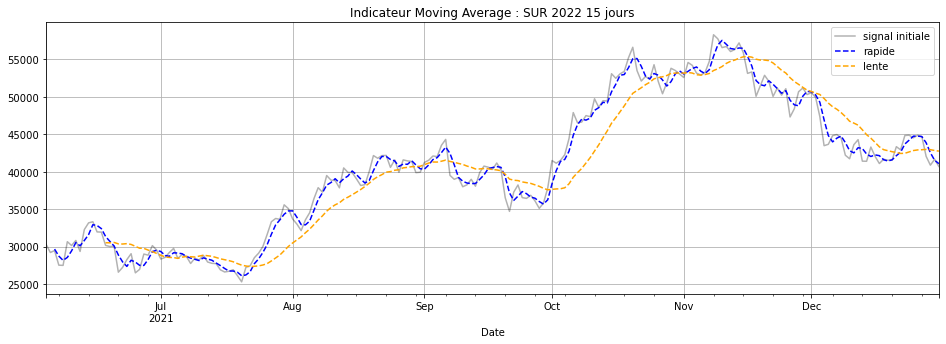

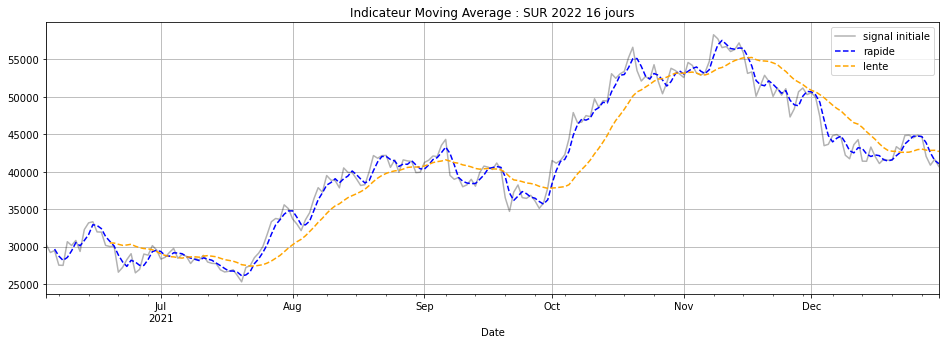

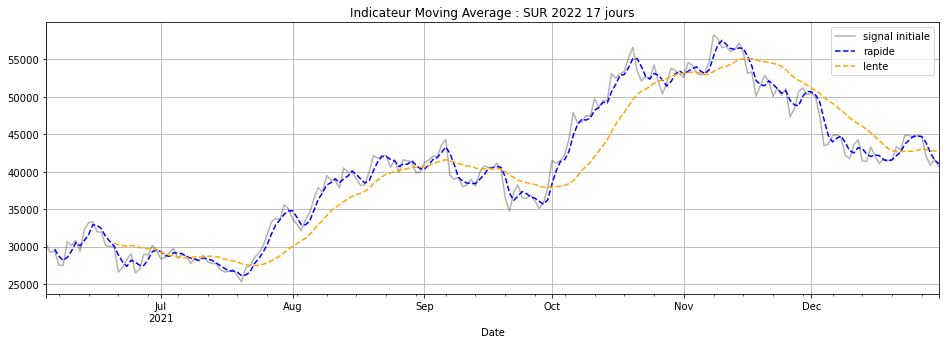

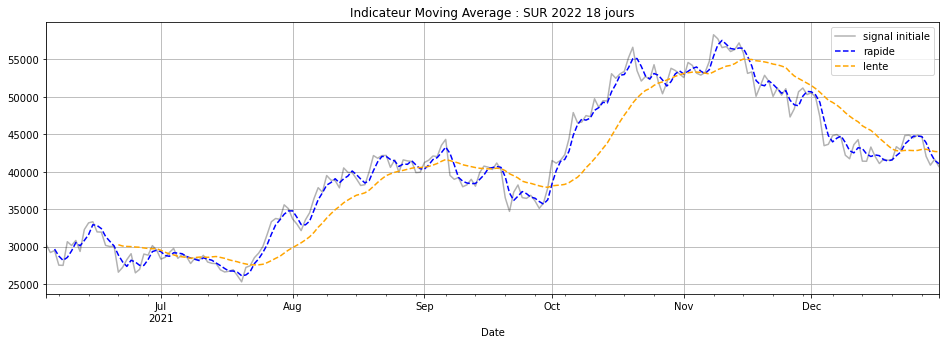

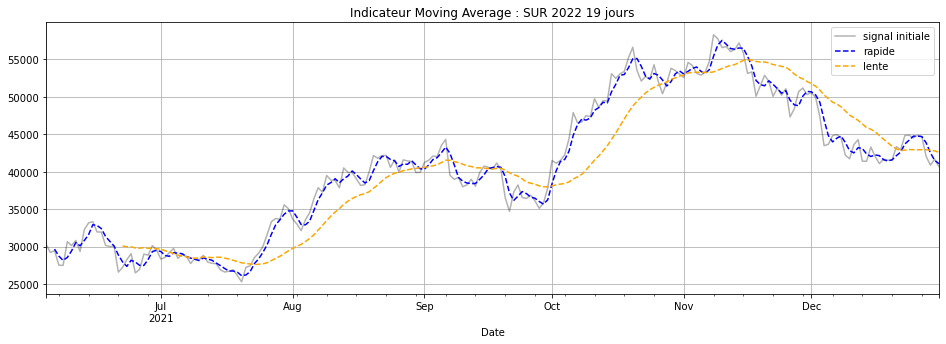

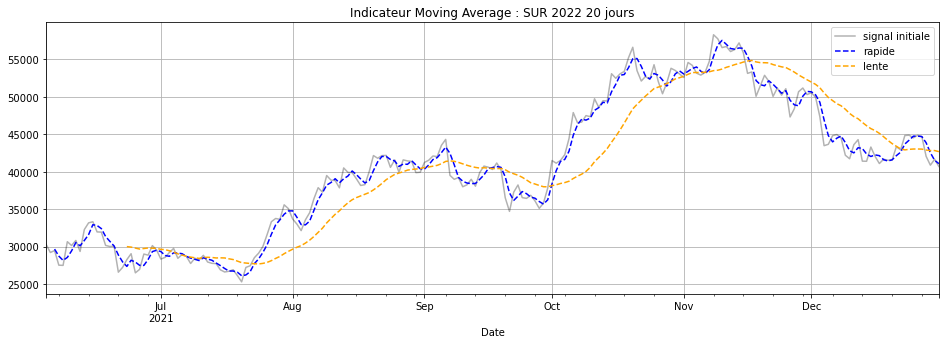

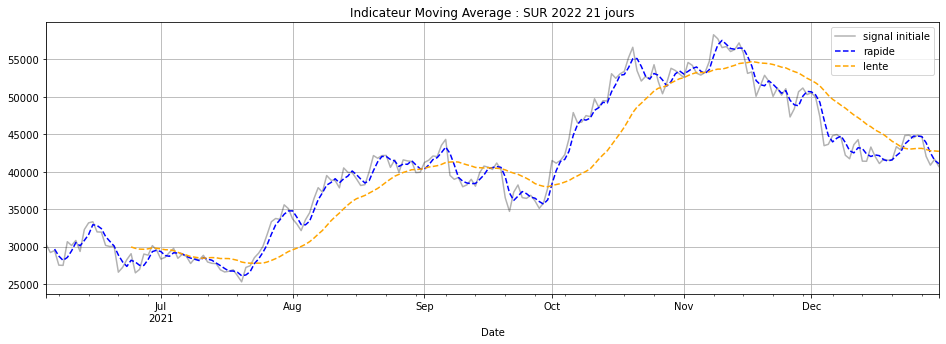

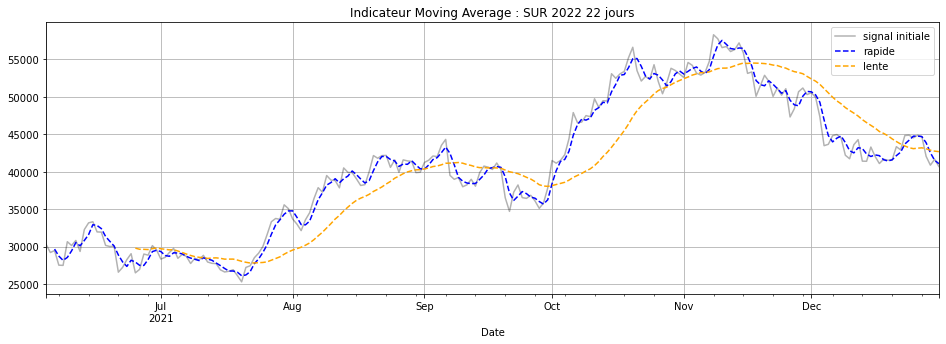

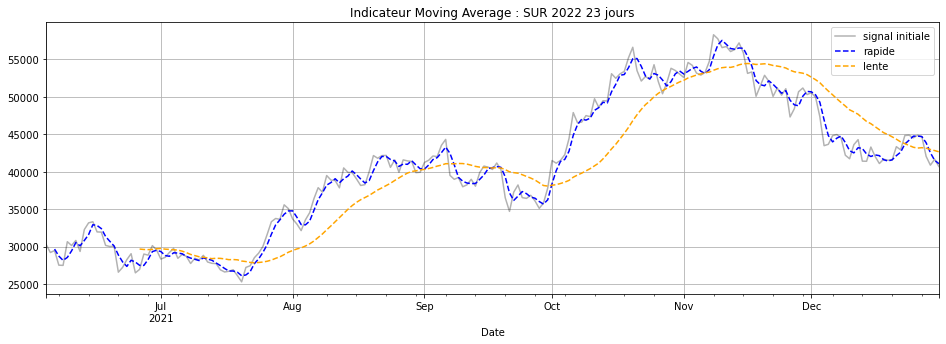

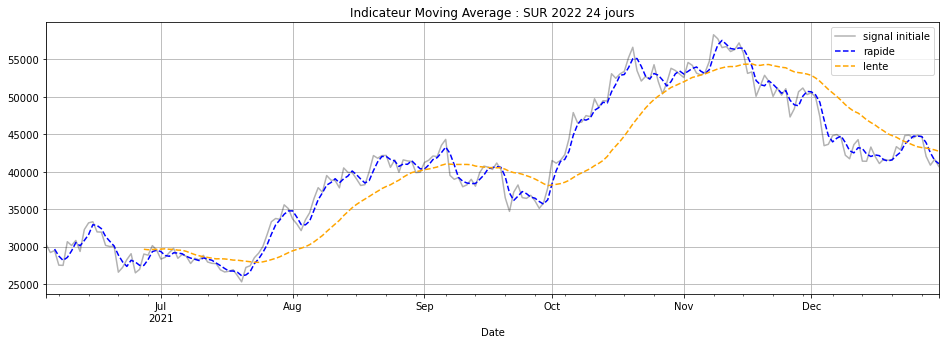

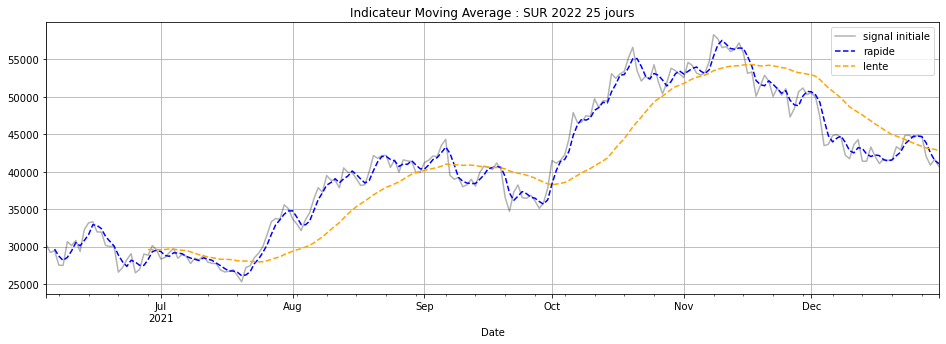

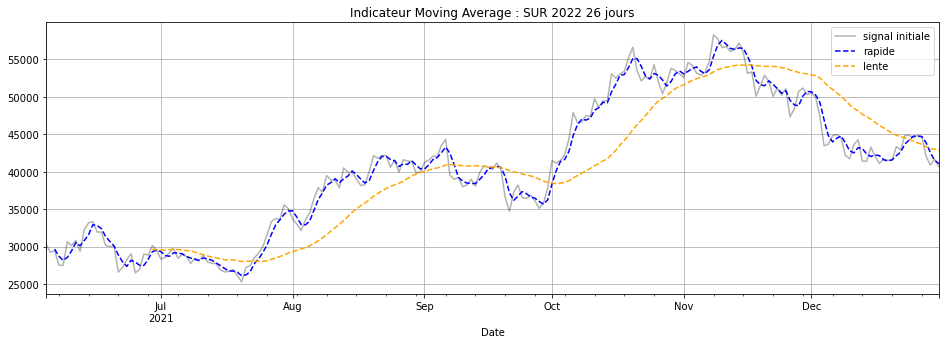

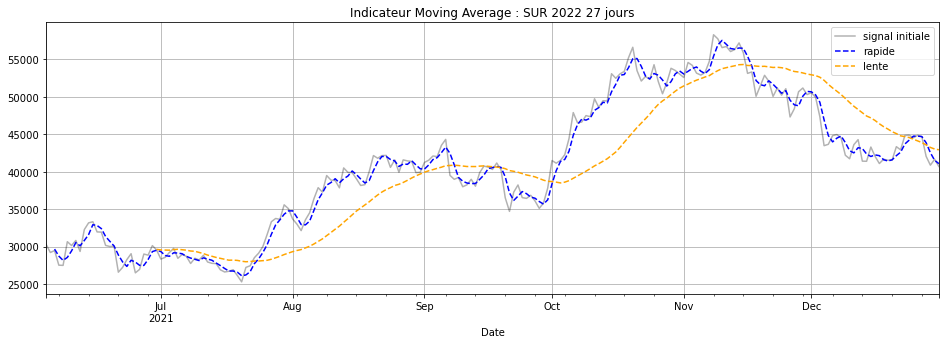

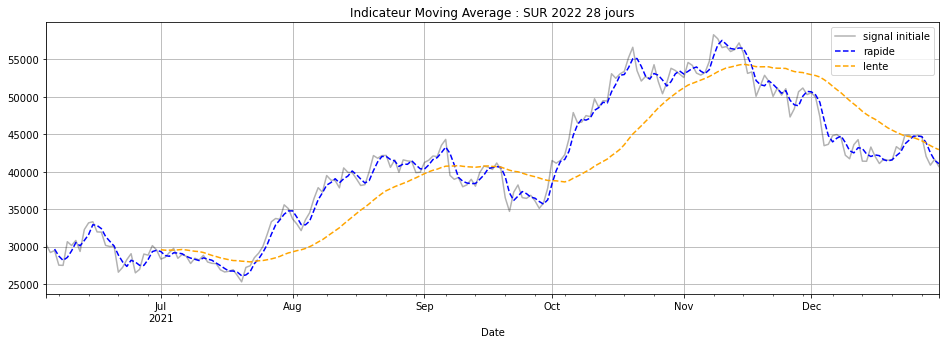

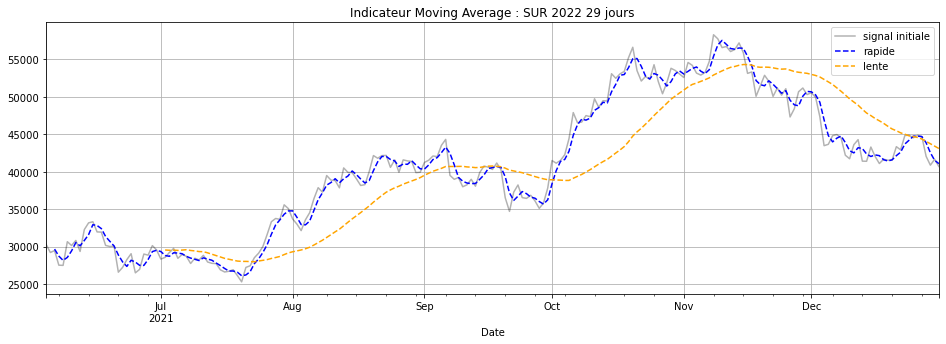

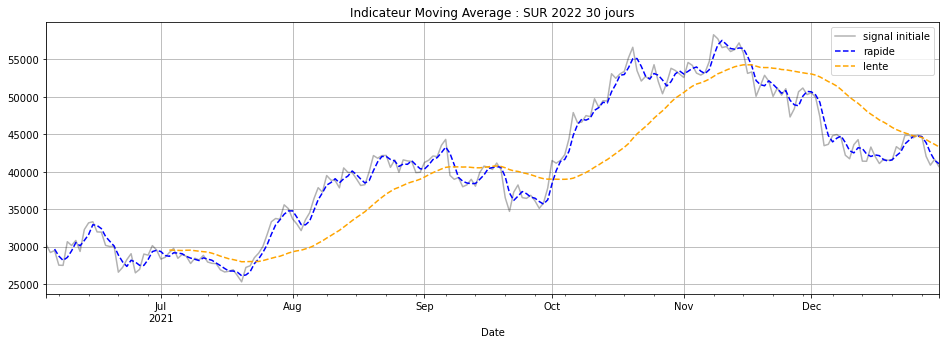

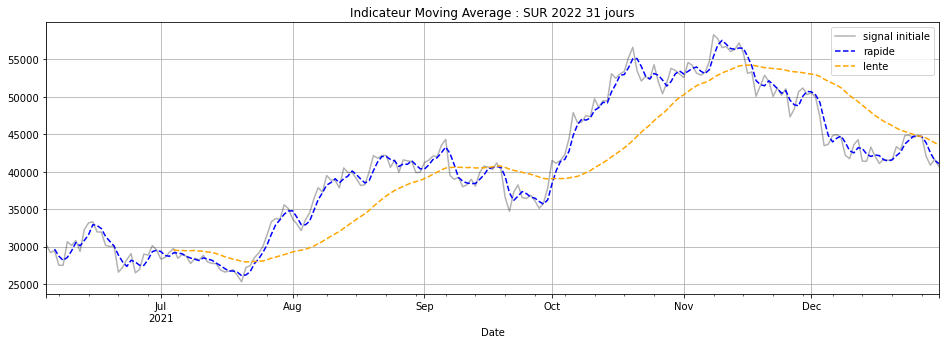

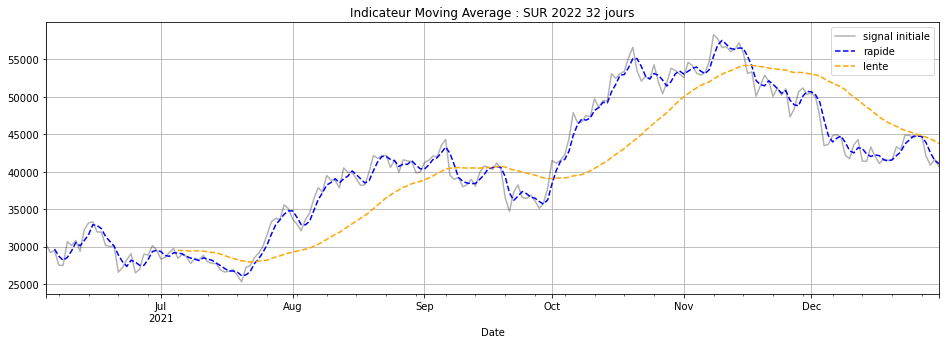

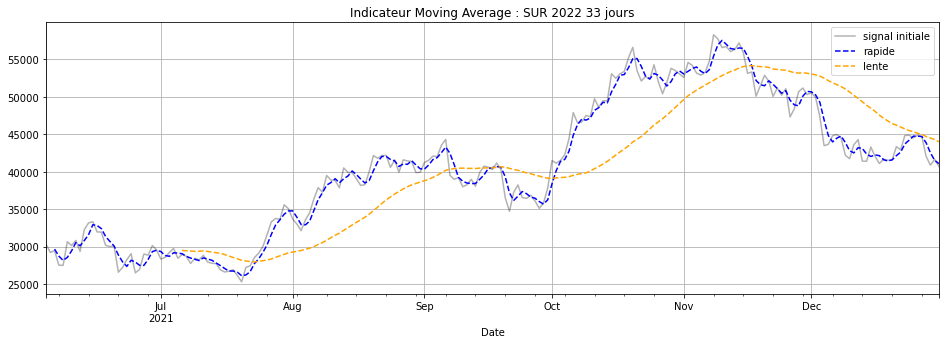

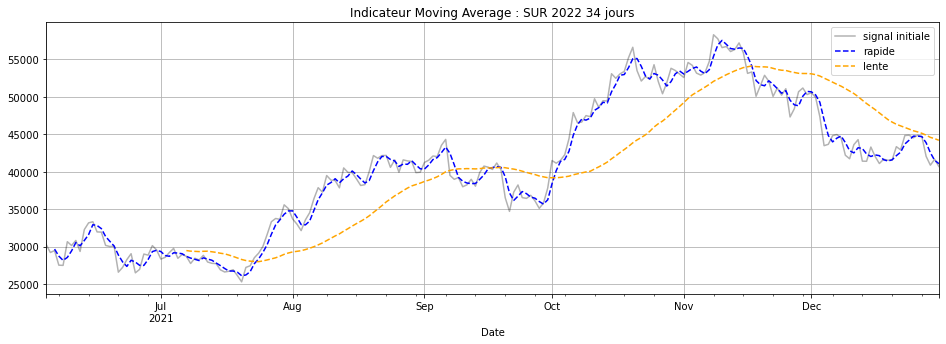

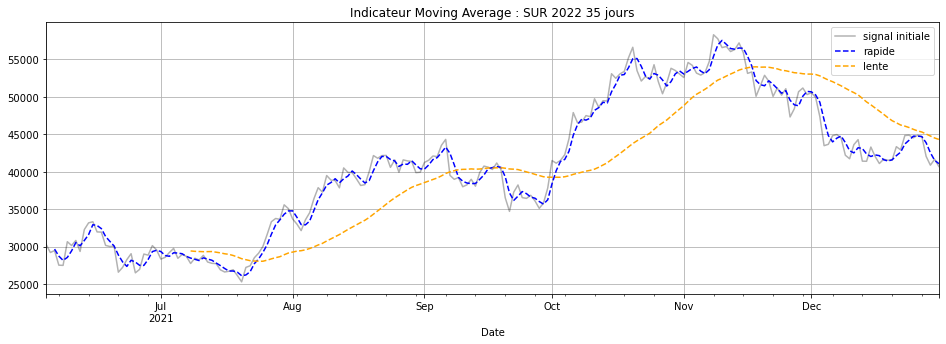

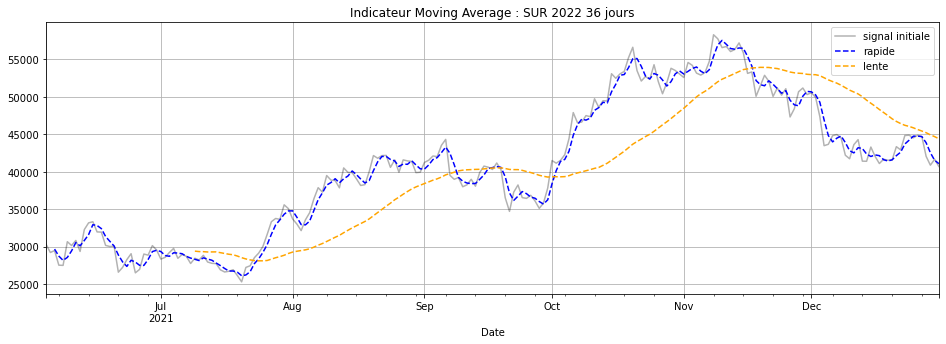

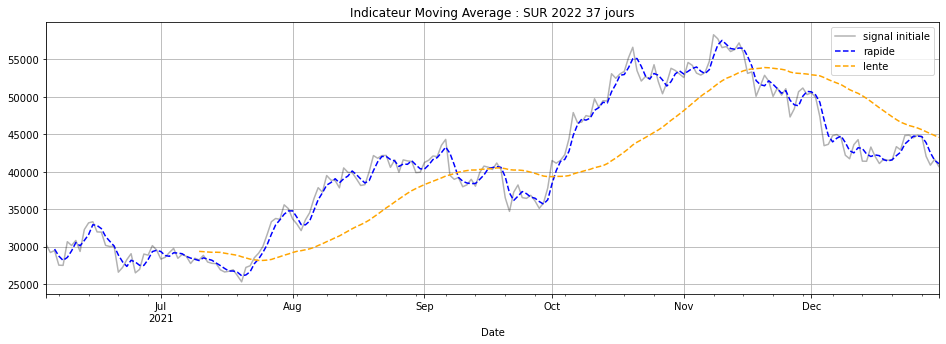

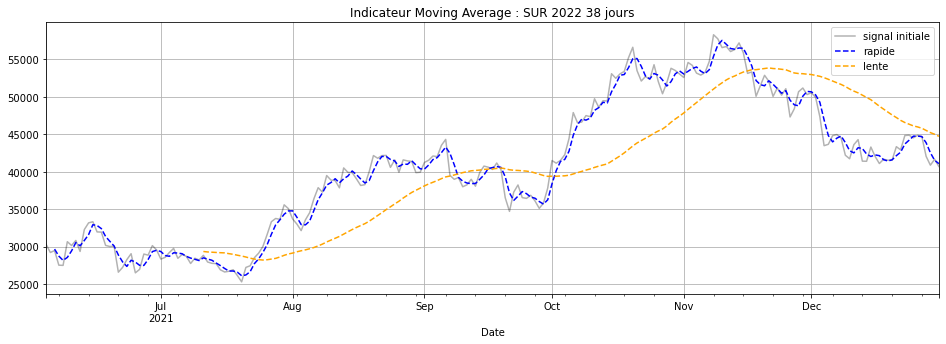

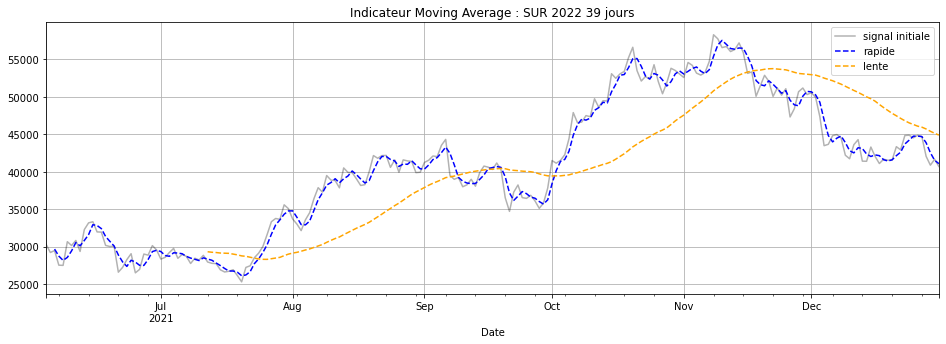

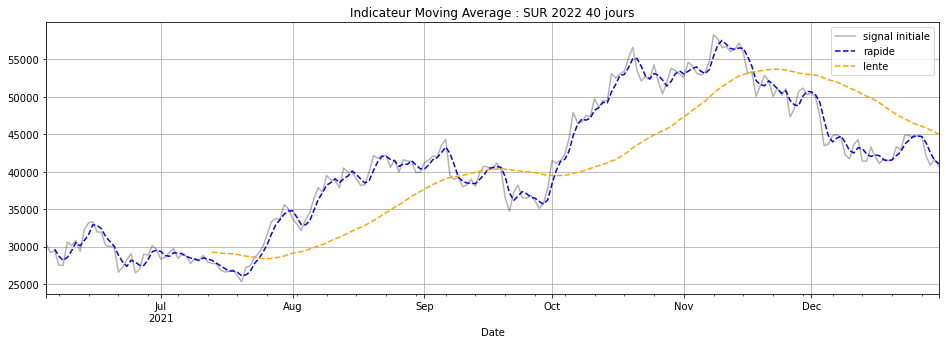

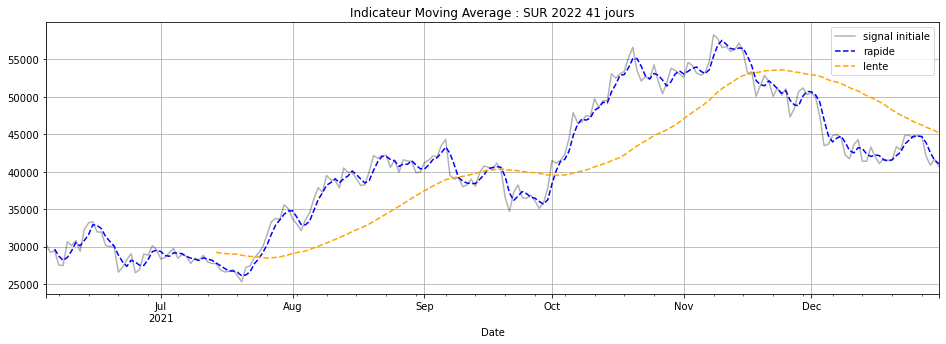

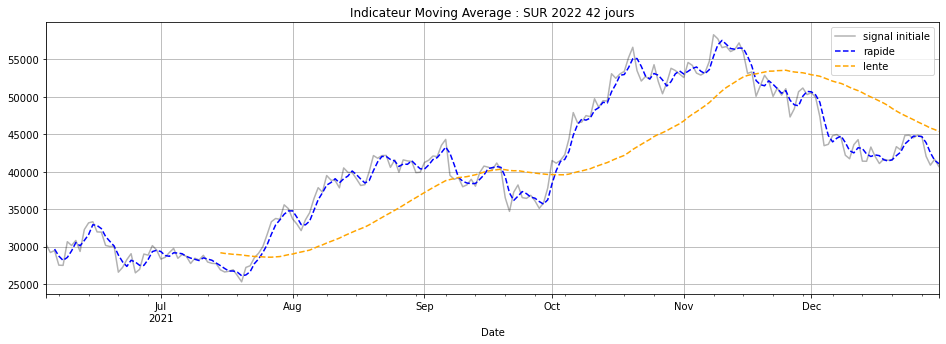

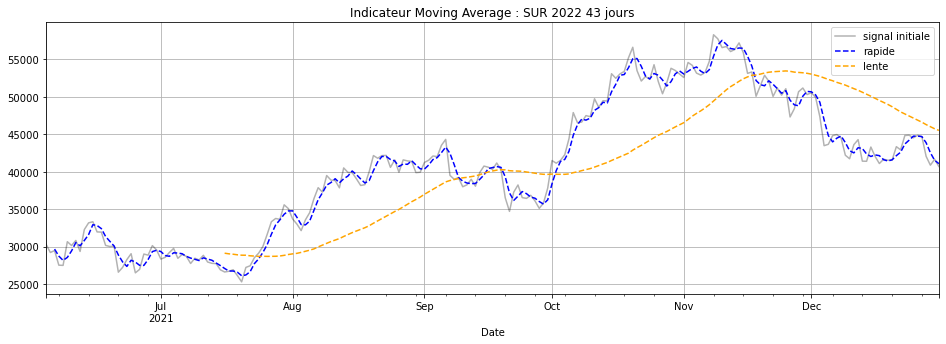

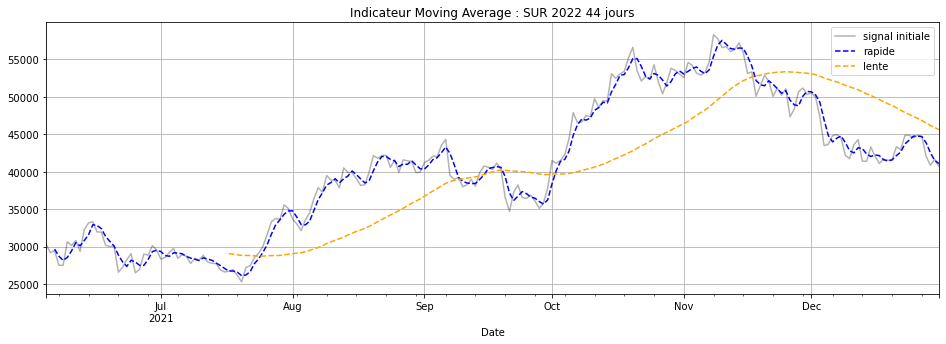

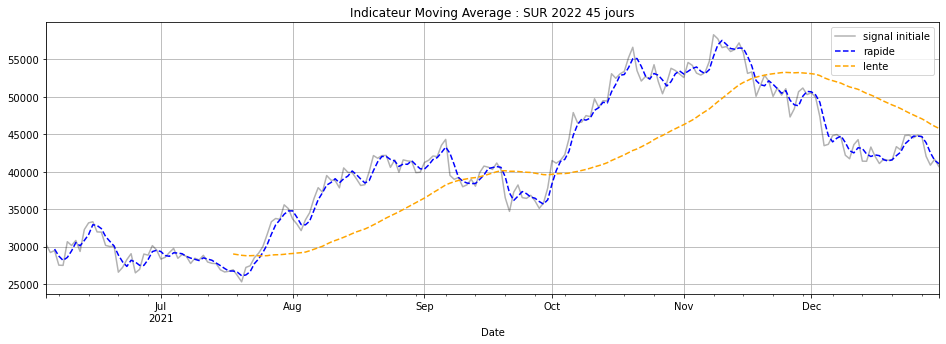

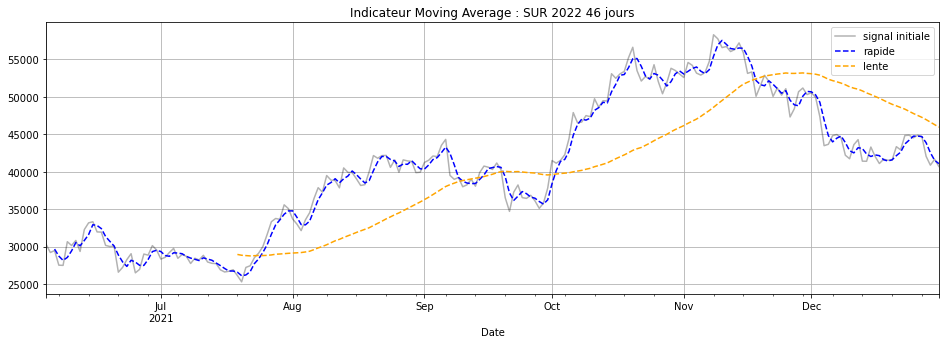

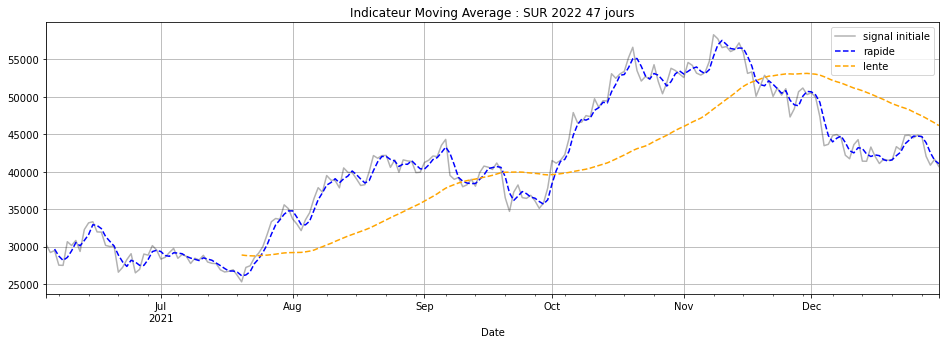

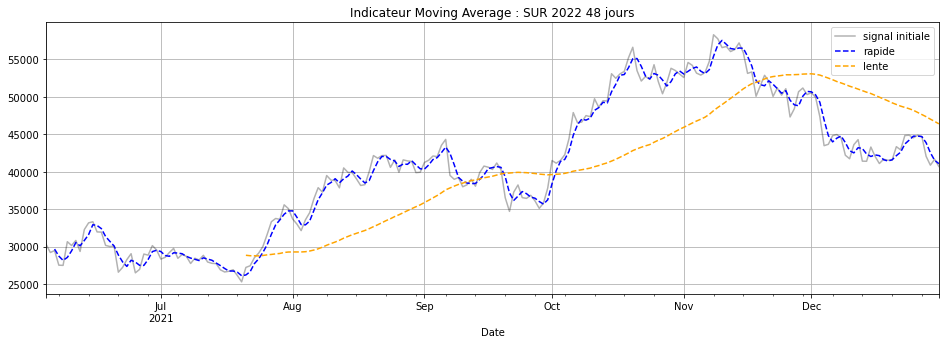

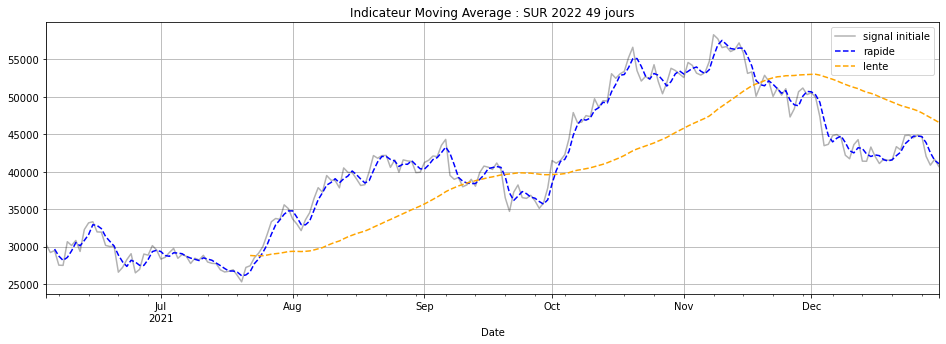

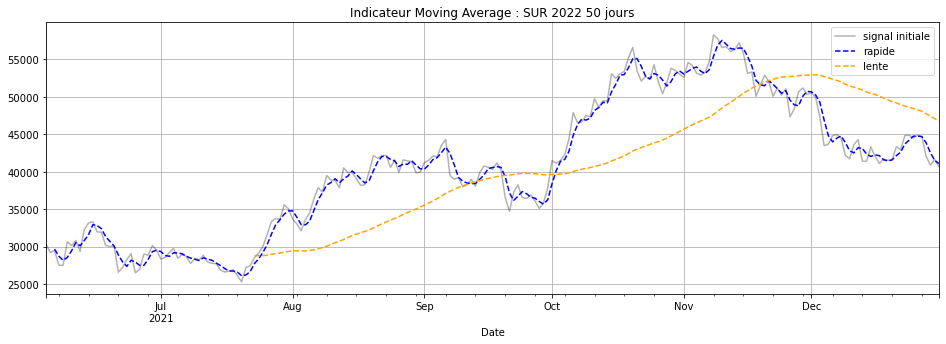

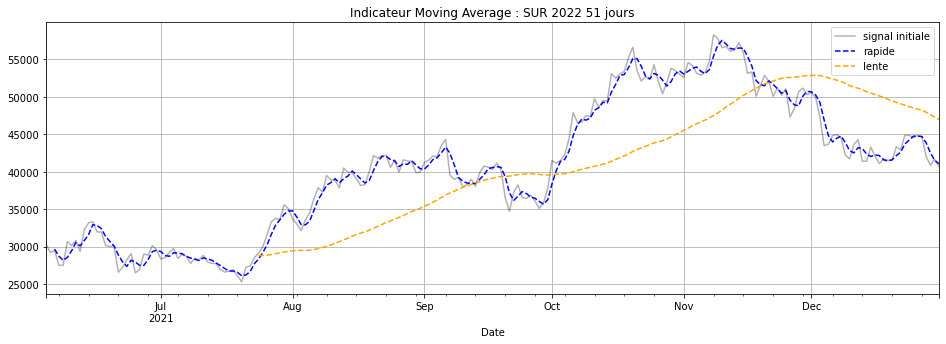

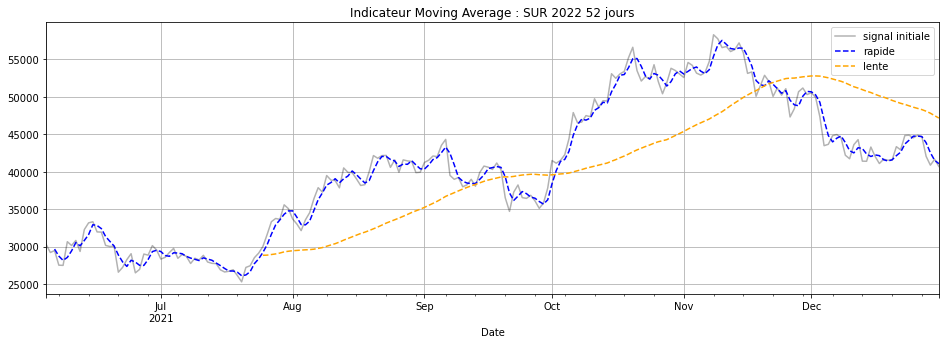

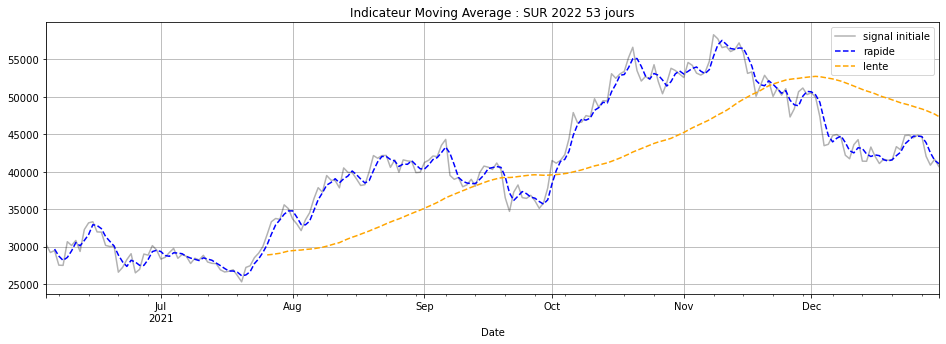

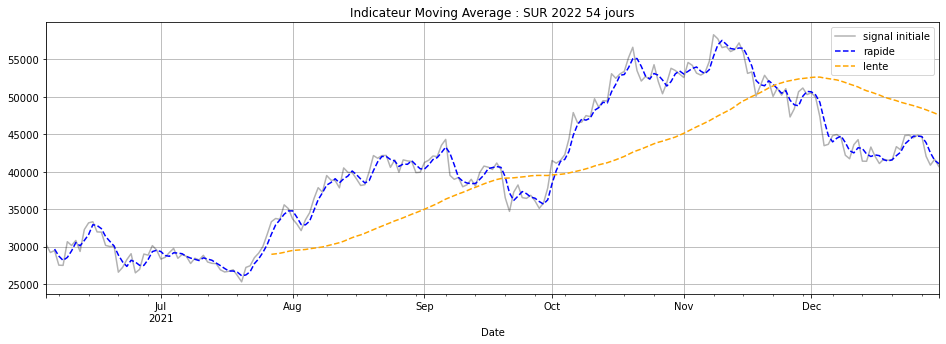

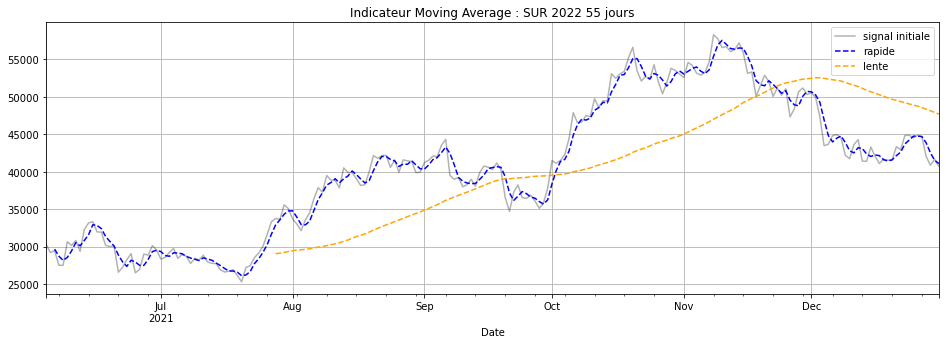

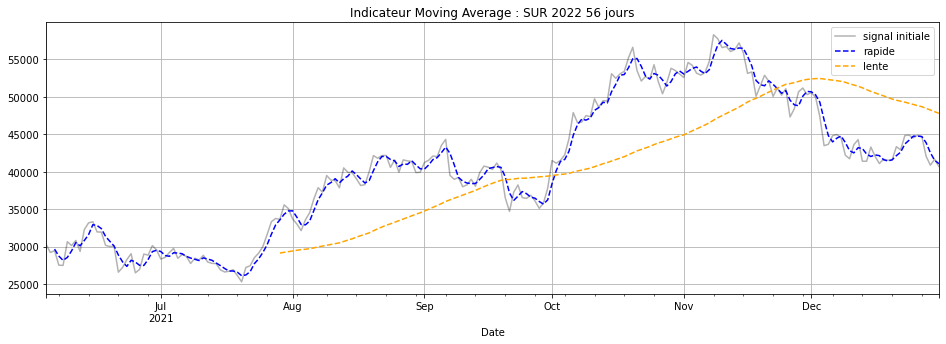

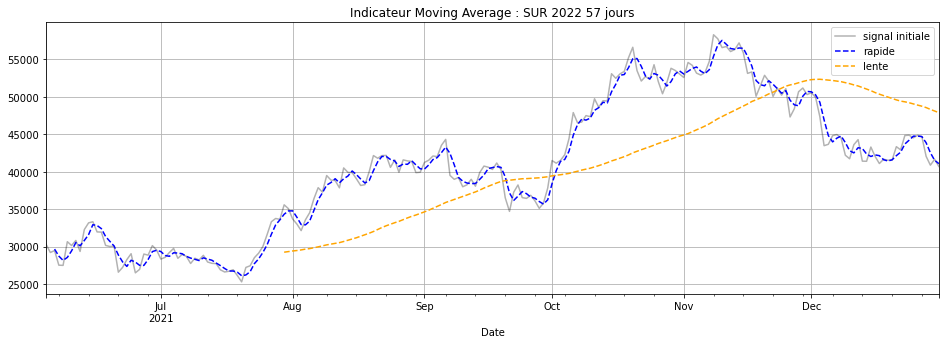

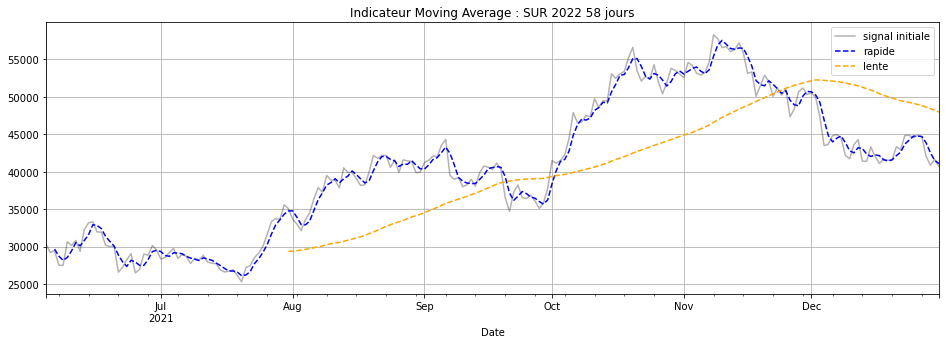

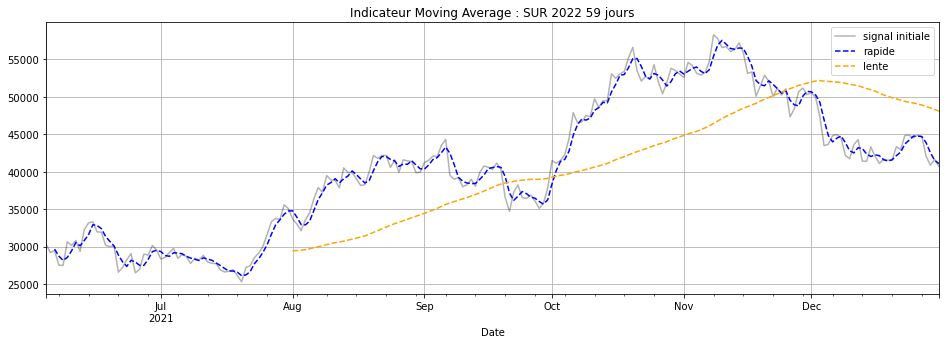

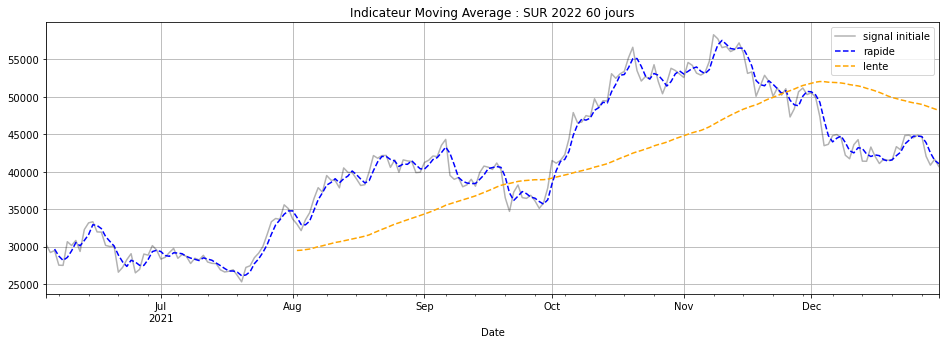

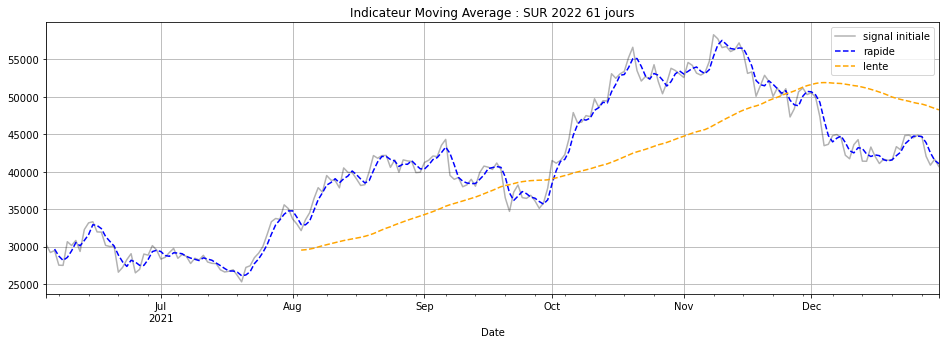

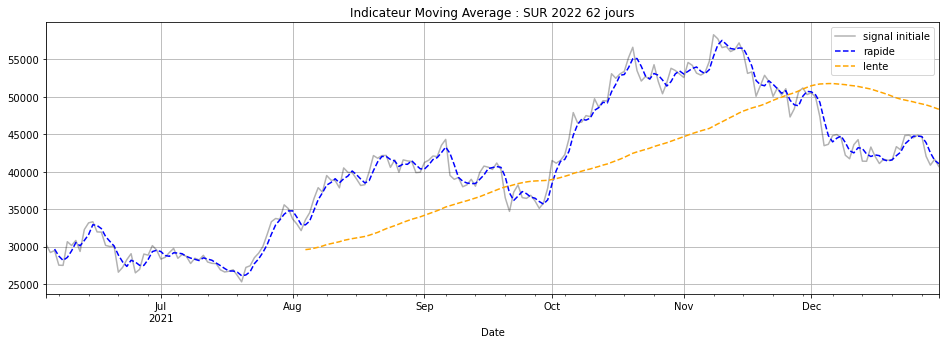

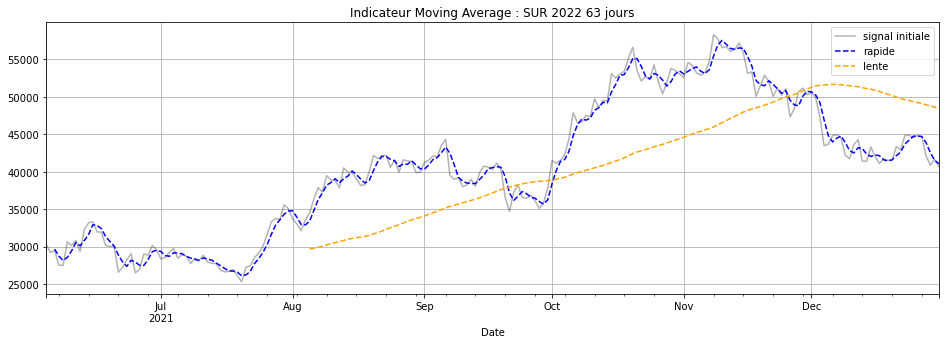

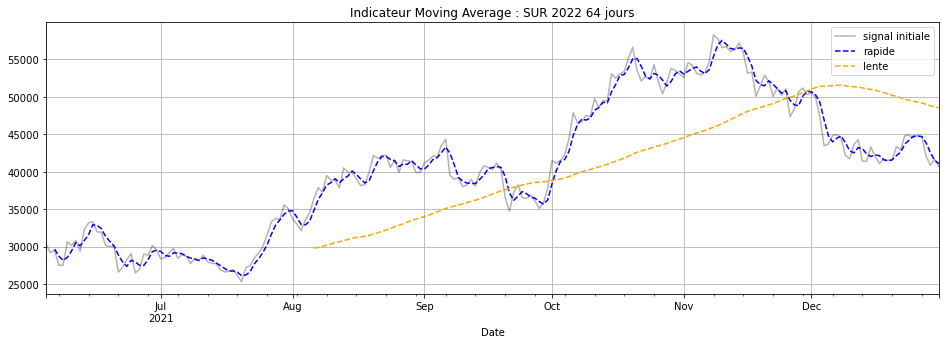

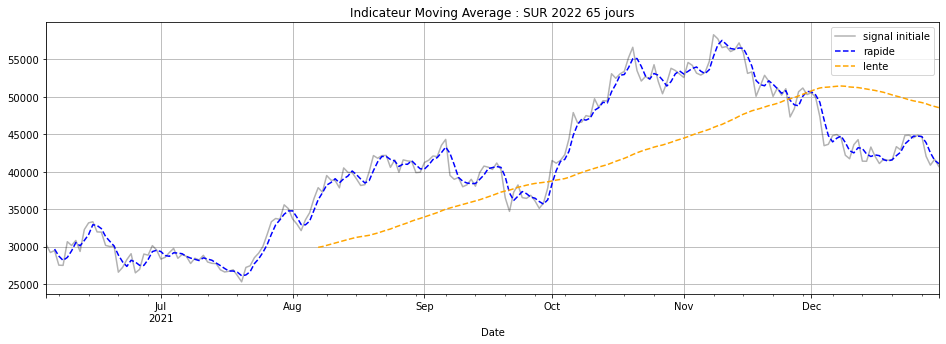

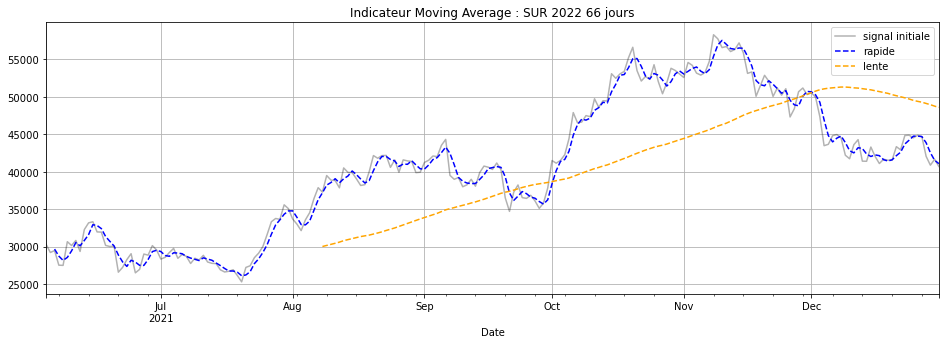

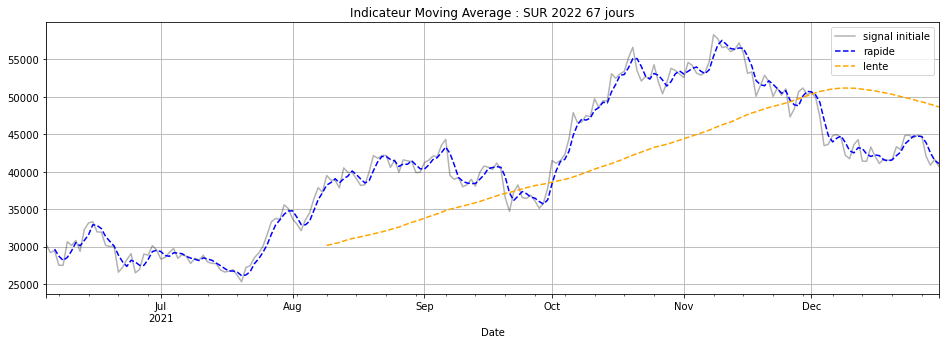

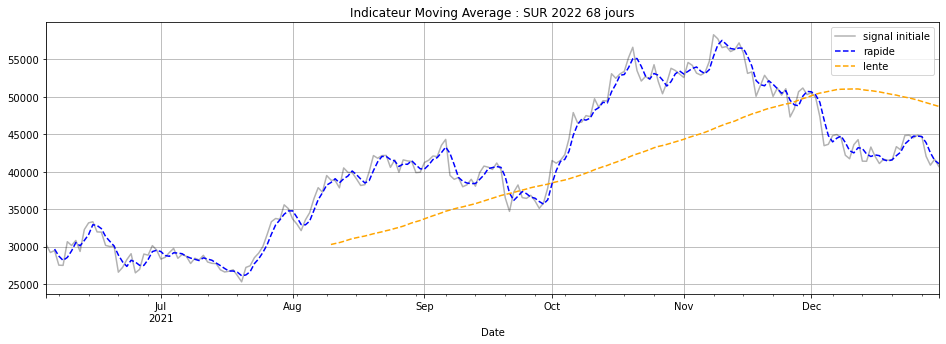

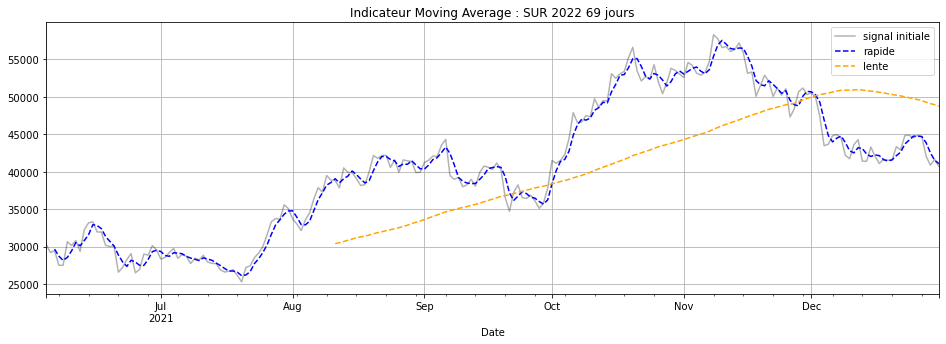

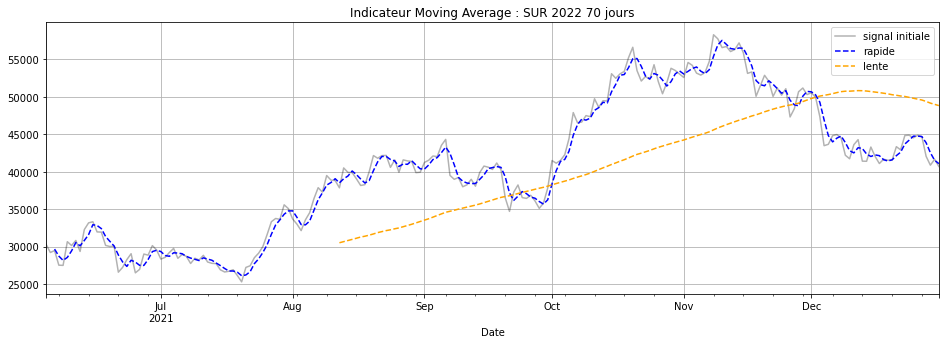

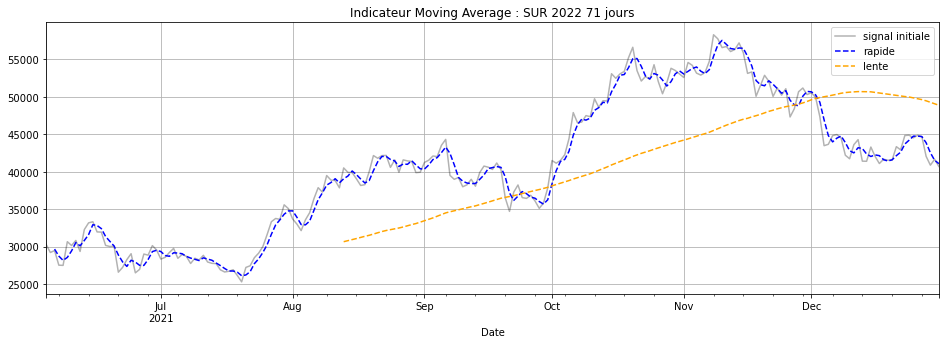

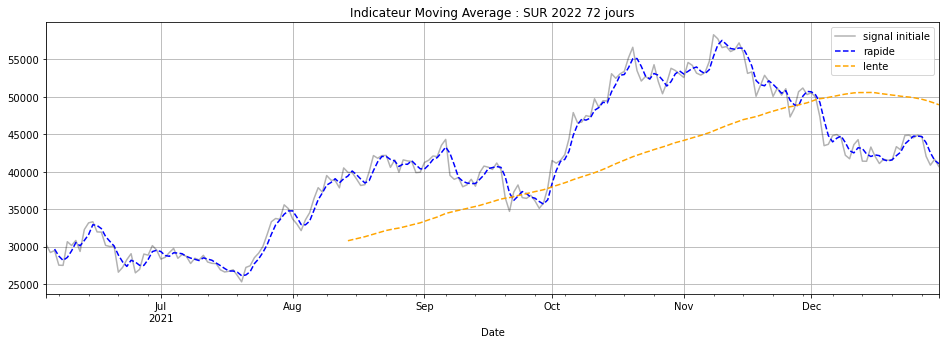

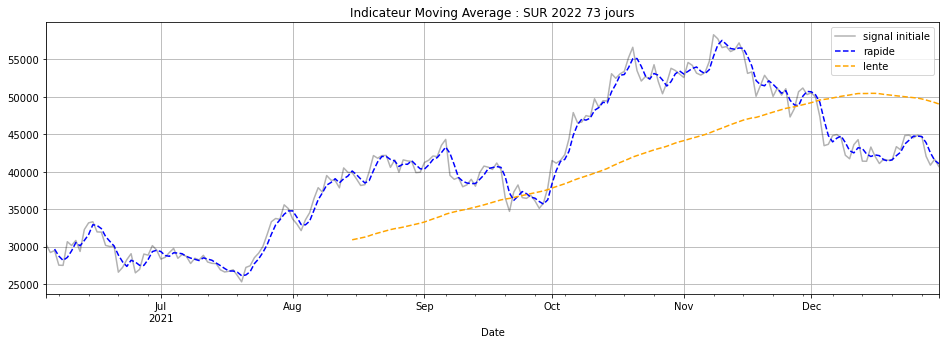

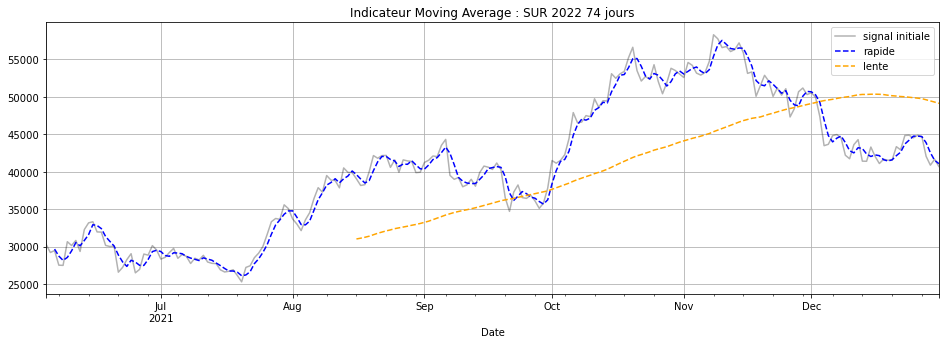

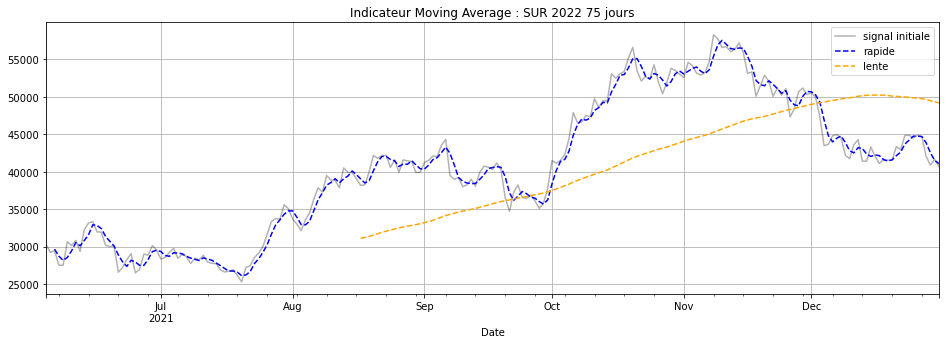

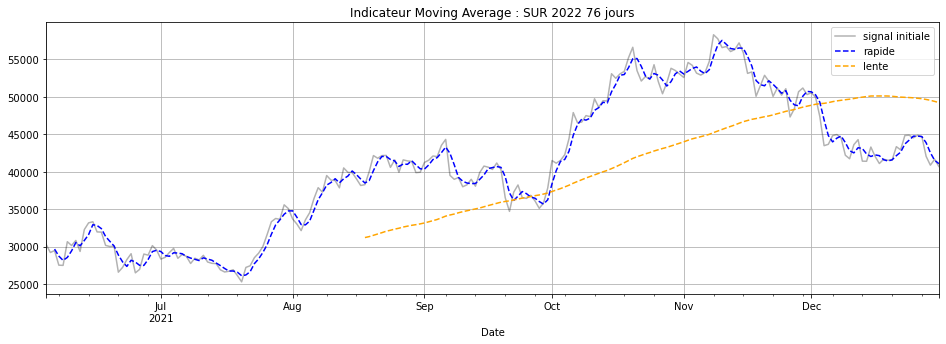

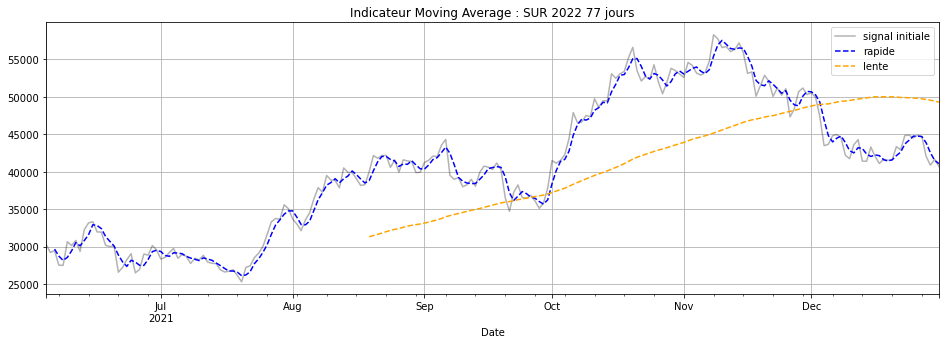

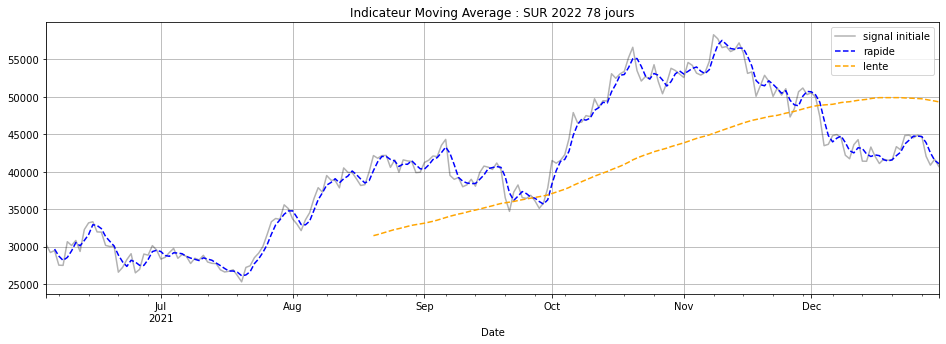

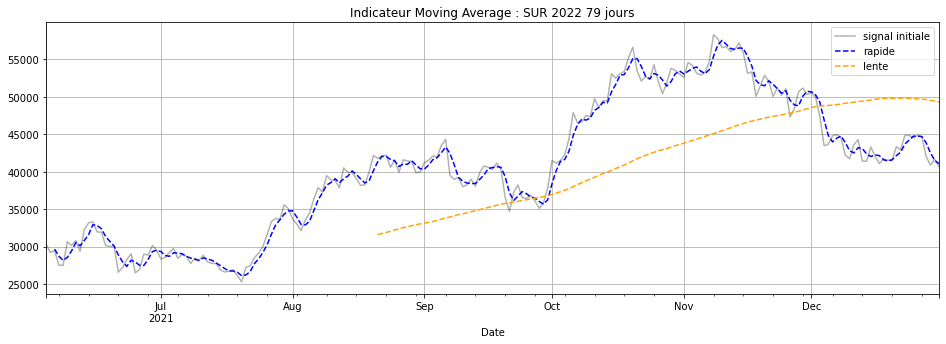

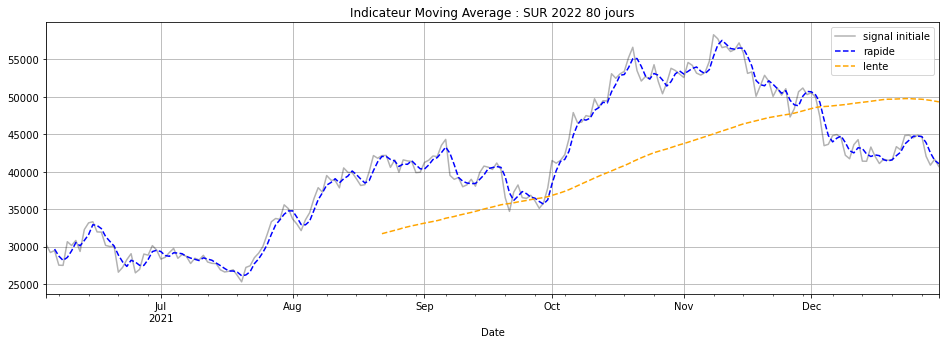

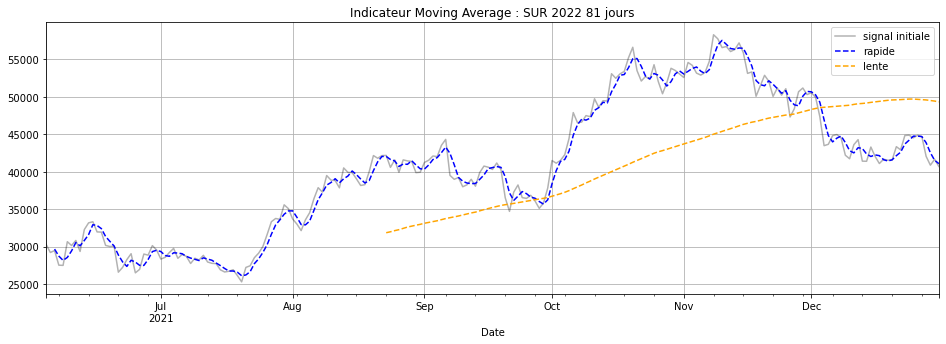

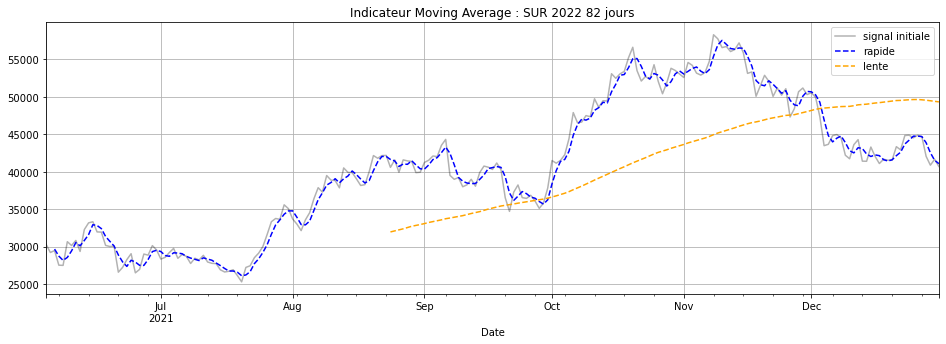

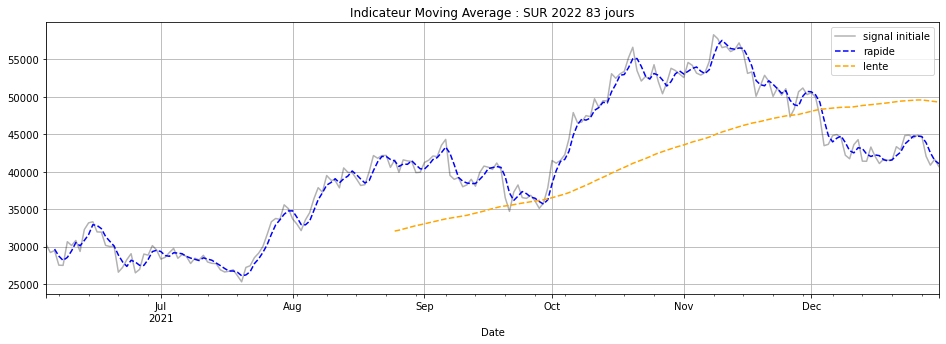

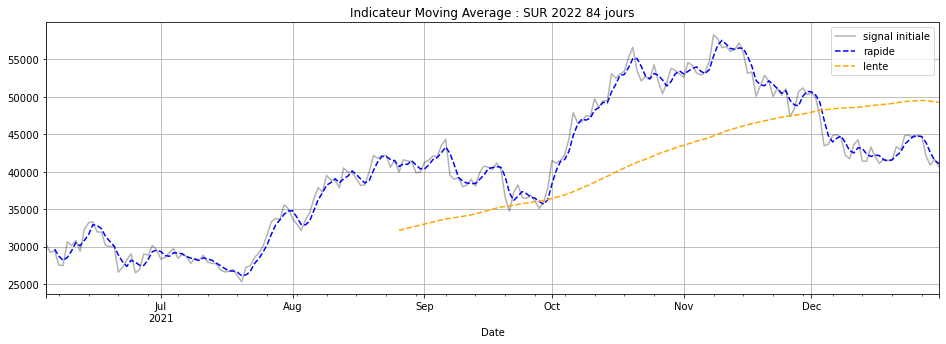

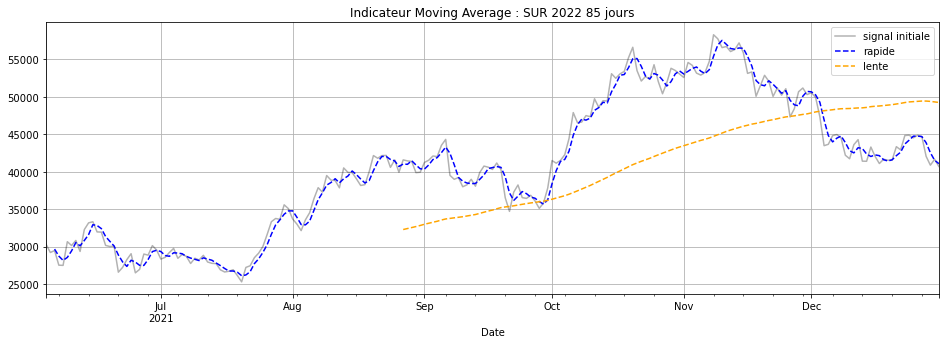

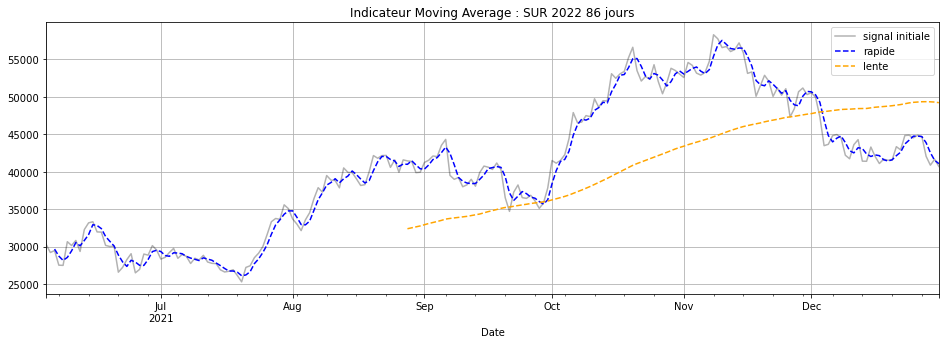

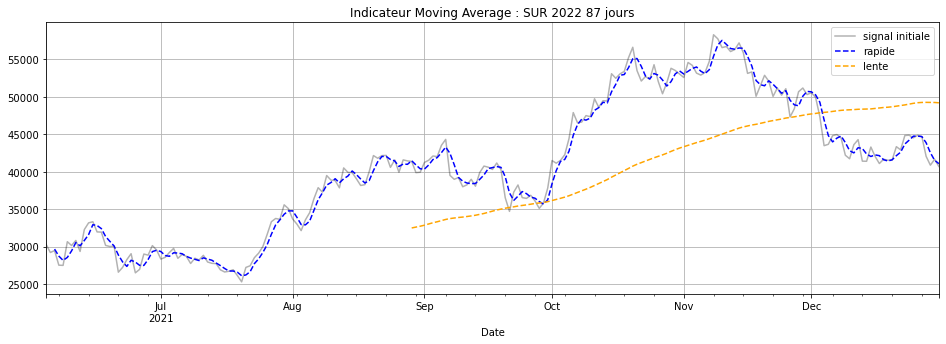

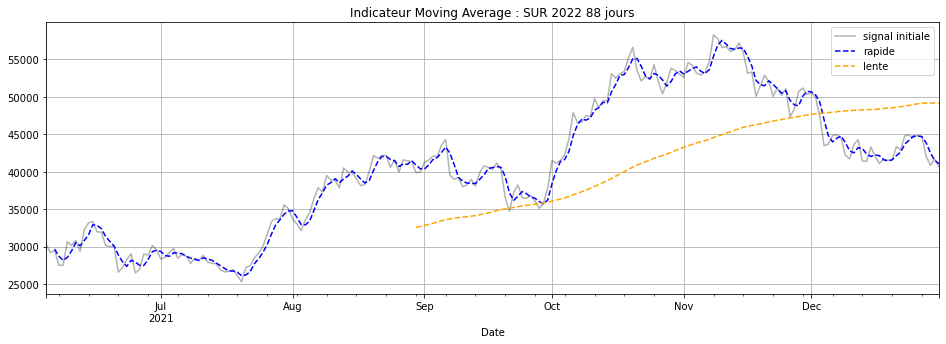

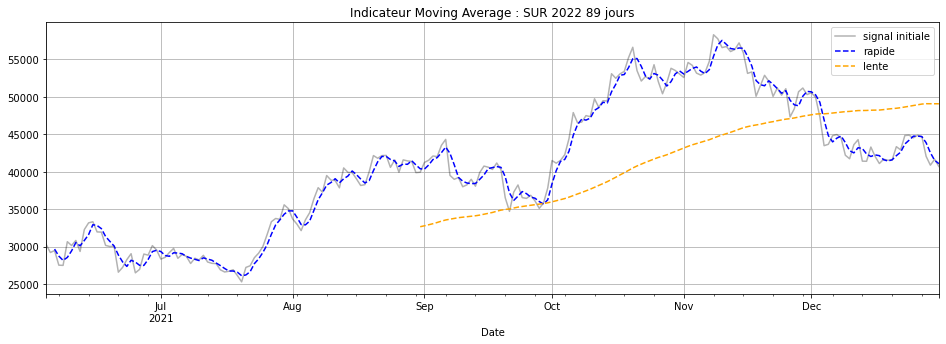

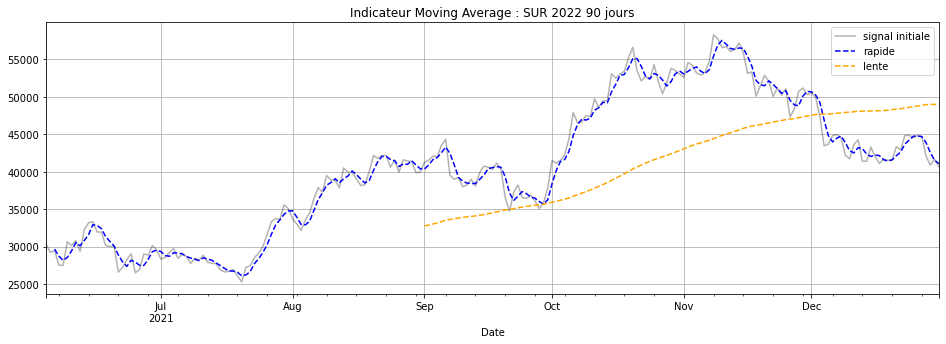

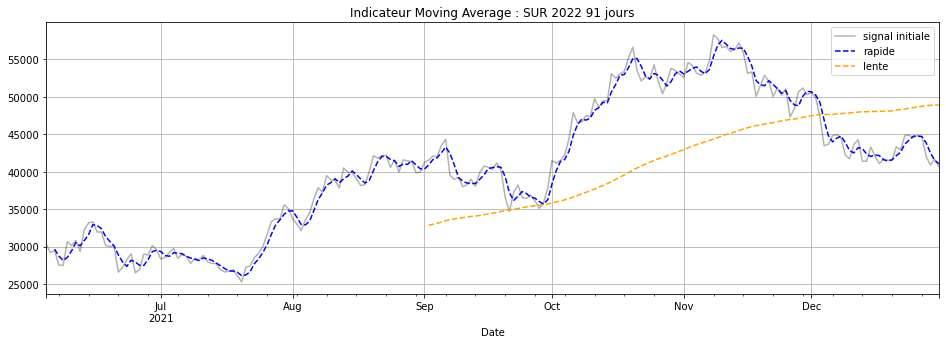

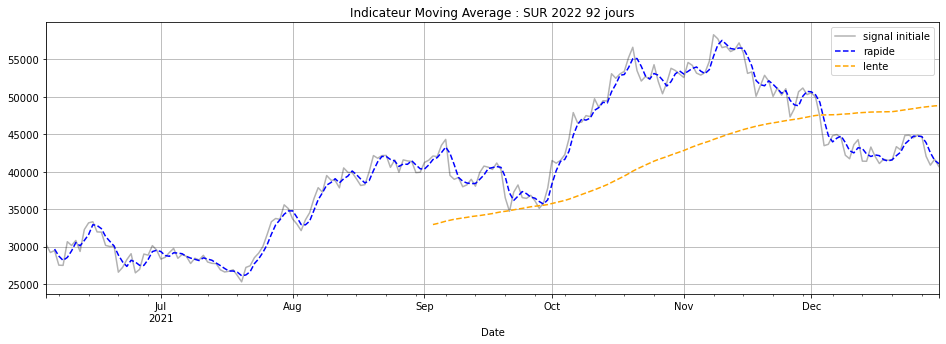

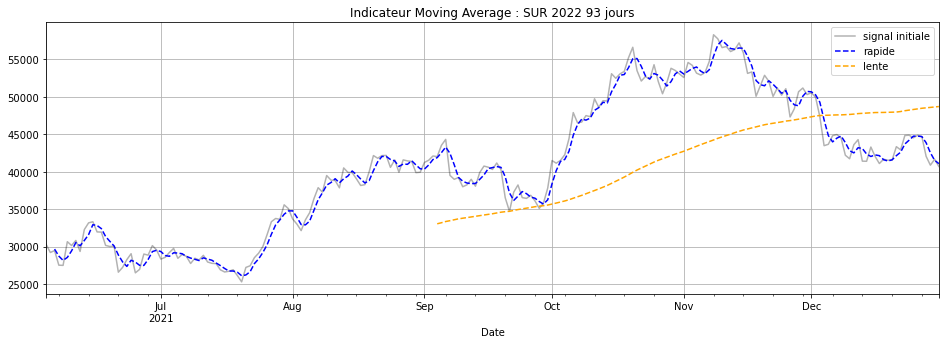

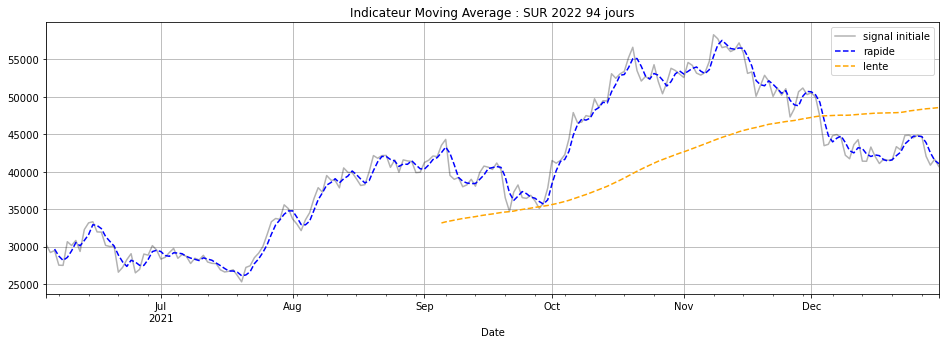

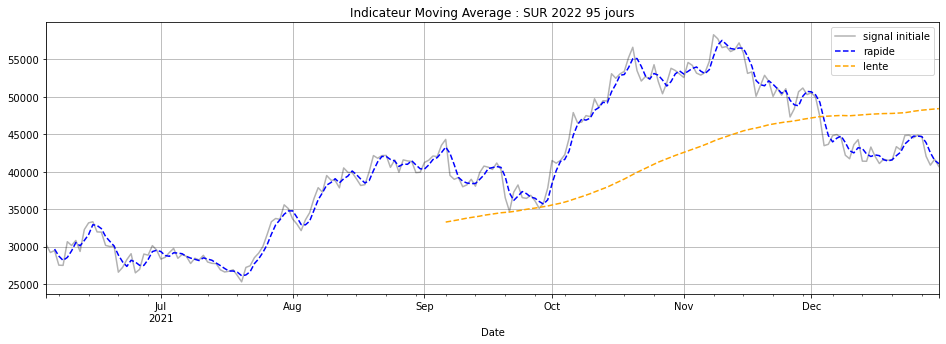

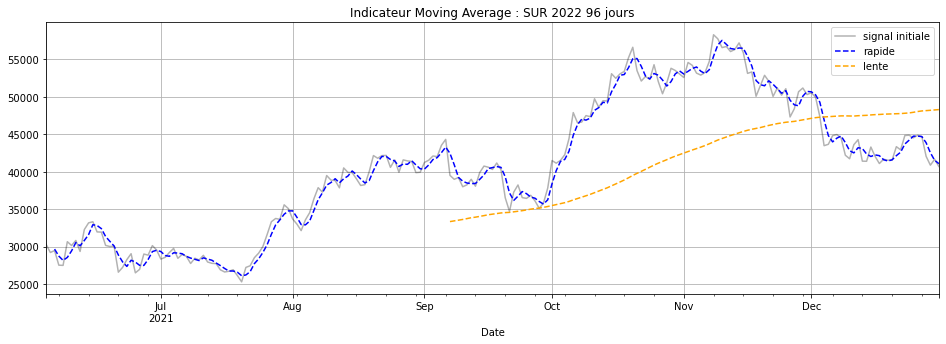

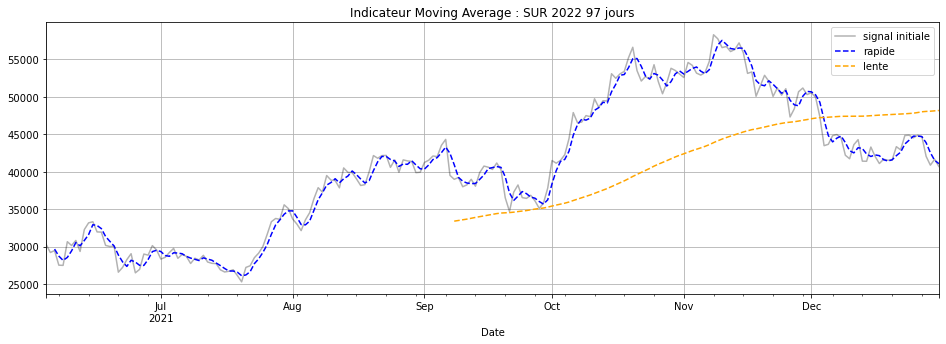

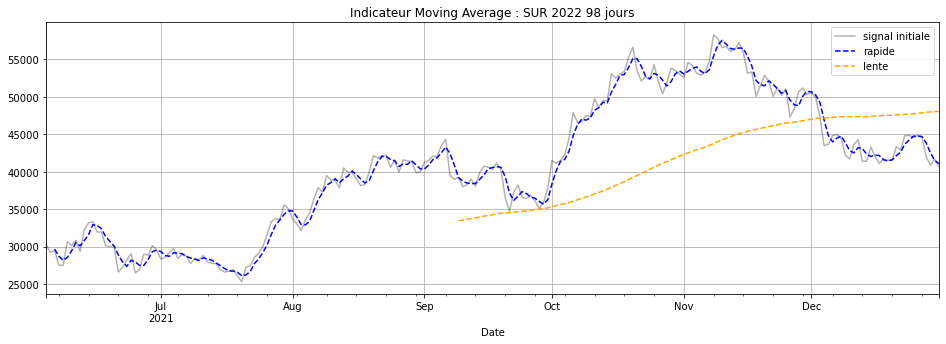

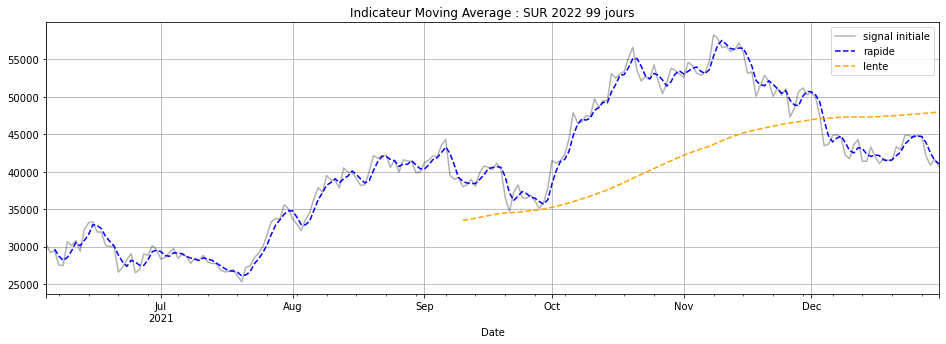

In [8]:
for k in range(3,100):
    
    plt.figure(figsize=(16,5))
    
    df.loc["2021" ,"Close"].plot(color="black", label="signal initiale",alpha=0.3)
    df.loc["2021" ,"Close"].rolling(window=3).mean().plot(label="rapide",ls='--',color='blue')
    df.loc["2021" ,"Close"].rolling(window=k).mean().plot(label="lente",ls='--',color='orange')
    


    plt.title(f'Indicateur Moving Average : SUR 2022 {k} jours')
    plt.legend()
    plt.grid()

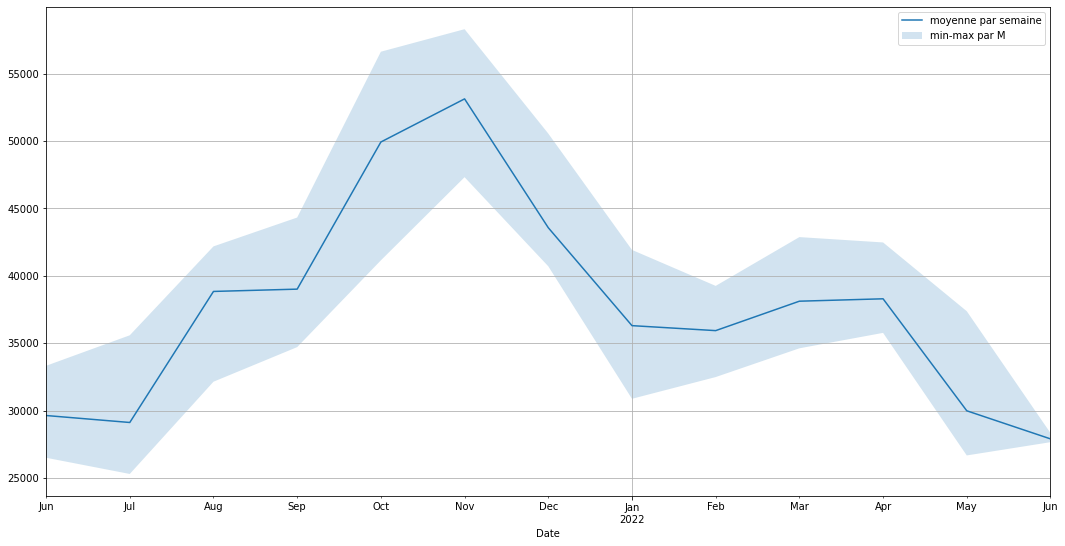

In [9]:
temporality = 'M'

m = btc['Close'].resample(temporality).agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(18, 9))
m['mean'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par '+ temporality)
 
plt.legend()
plt.grid()
plt.show()

In [10]:
cours = 'BNB-EUR'

bnb = yf.download(cours, start, end)

bnb.head()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-06-04  352.974121  353.184967  302.352173  321.679199  321.679199   
2021-06-05  321.320435  350.060547  308.277710  320.906097  320.906097   
2021-06-06  320.745697  328.804230  314.259277  323.670990  323.670990   
2021-06-07  323.534943  334.970764  291.962524  293.065826  293.065826   
2021-06-08  293.767303  300.200470  262.929169  290.813904  290.813904   

                Volume  
Date                    
2021-06-04  4069488476  
2021-06-05  3251656885  
2021-06-06  1727513572  
2021-06-07  2400923037  
2021-06-08  3689479431

In [11]:
cours = 'ETH-EUR'

eth = yf.download(cours, start, end)

eth.head()

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-06-04  2355.290283  2355.290283  2114.824219  2209.368408  2209.368408   
2021-06-05  2212.182861  2315.764160  2102.678711  2162.139404  2162.139404   
2021-06-06  2161.458740  2254.905518  2150.291992  2231.466797  2231.466797   
2021-06-07  2229.785889  2339.422119  2119.679688  2124.533936  2124.533936   
2021-06-08  2128.092773  2149.397949  1901.163330  2068.088379  2068.088379   

                 Volume  
Date                     
2021-06-04  28086728595  
2021-06-05  25066008226  
2021-06-06  20803003643  
2021-06-07  25098211269  
2021-06-08  34429058312

In [12]:
btc_eth = pd.merge(btc, eth, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

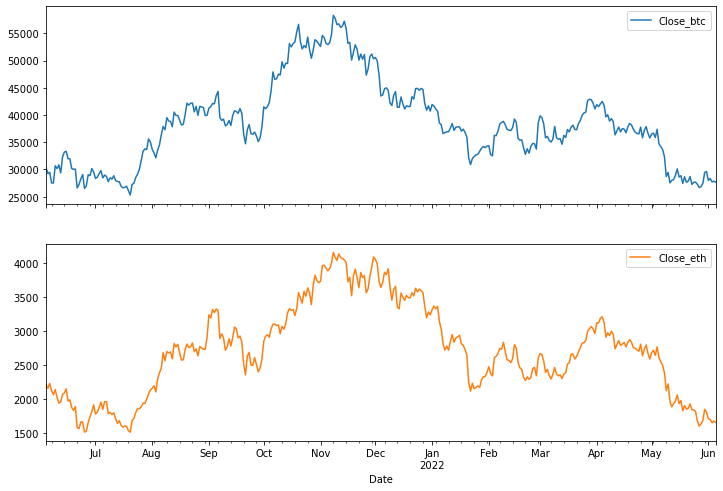

In [13]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

<AxesSubplot:>

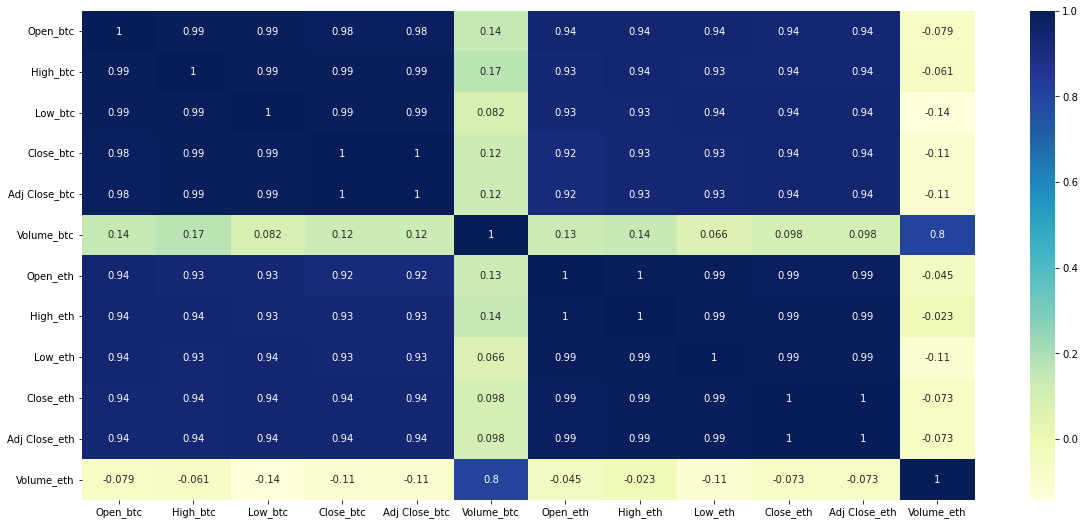

In [14]:
plt.figure(figsize=(20,9)) 
sns.heatmap(btc_eth.corr(),annot = True,cmap="YlGnBu") 

<AxesSubplot:>

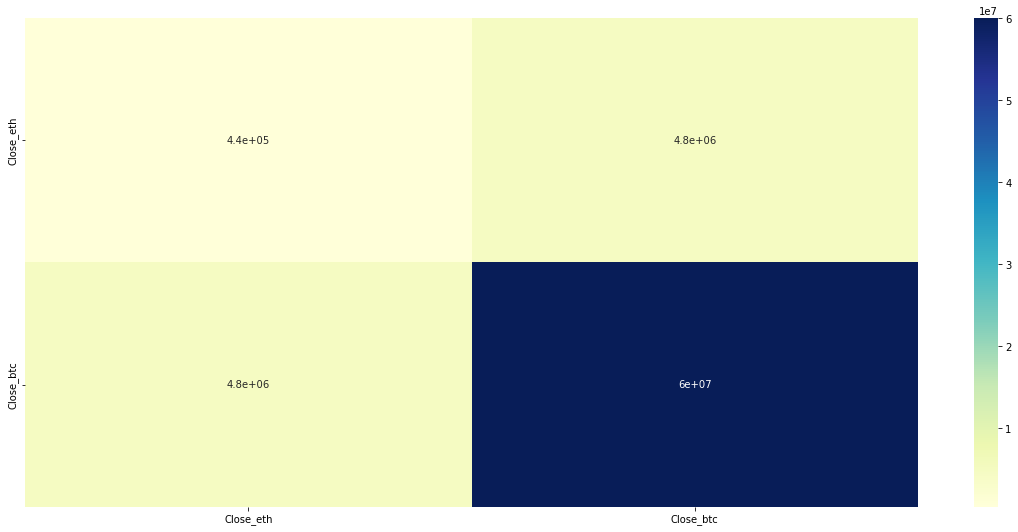

In [15]:
plt.figure(figsize=(20,9)) 
sns.heatmap(btc_eth[['Close_eth','Close_btc']].cov().round(2),annot = True,cmap="YlGnBu") 

In [16]:
btc_eth.describe().round(2)

Open_btc  High_btc   Low_btc  Close_btc  Adj Close_btc    Volume_btc  \
count    367.00    367.00    367.00     367.00         367.00  3.670000e+02   
mean   38446.82  39325.10  37456.53   38424.66       38424.66  2.794610e+10   
std     7748.12   7860.68   7634.15    7749.40        7749.40  8.312122e+09   
min    25290.46  26284.10  24278.27   25299.85       25299.85  1.213257e+10   
25%    33062.42  34053.47  32194.46   33096.77       33096.77  2.254302e+10   
50%    37771.25  38350.79  36834.03   37777.12       37777.12  2.762756e+10   
75%    42034.01  42784.54  41201.90   41977.45       41977.45  3.248919e+10   
max    58290.29  59496.15  57269.13   58305.04       58305.04  7.410303e+10   

       Open_eth  High_eth  Low_eth  Close_eth  Adj Close_eth    Volume_eth  
count    367.00    367.00   367.00     367.00         367.00  3.670000e+02  
mean    2720.23   2796.69  2631.68    2717.51        2717.51  1.669853e+10  
std      662.36    673.87   648.57     663.00         663.00  5.398139e+09  
min     1516.15   1550.07  1434.84    1517.20        1517.20  5.985884e+09  
25%     2227.40   2327.84  2117.81    2217.55        2217.55  1.320870e+10  
50%     2721.10   2789.71  2630.59    2721.20        2721.20  1.590289e+10  
75%     3133.34   3230.88  3080.50    3133.69        3133.69  1.950319e+10  
max     4150.73   4300.86  4070.35    4152.47        4152.47  4.351551e+10

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


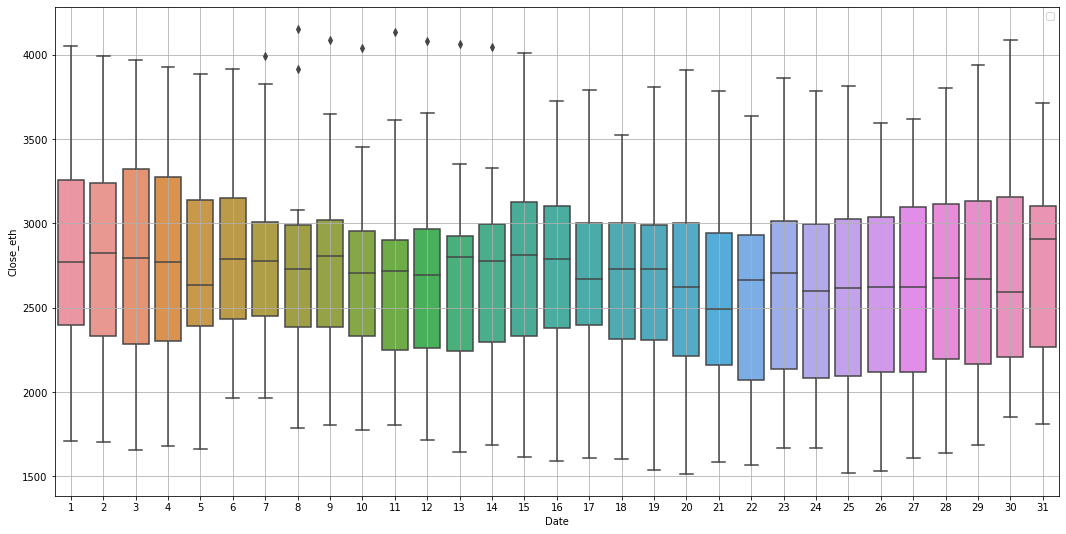

In [17]:
temporality = 'W'

m = btc_eth['Close_eth']

plt.figure(figsize=(18, 9))
sns.boxplot(btc_eth['Close_eth'].index.day, btc_eth['Close_eth'])
plt.legend()
plt.grid()
plt.show()

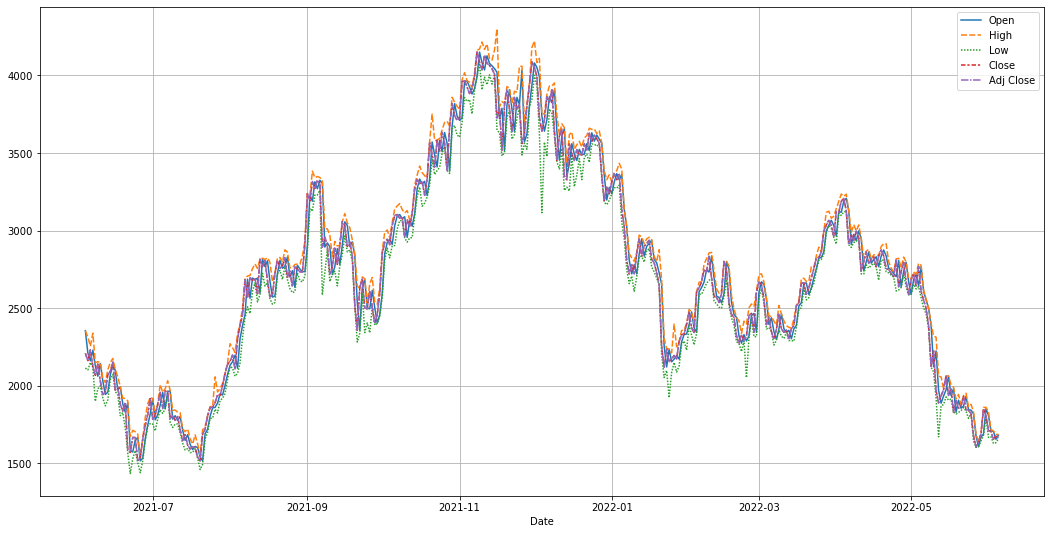

In [18]:
plt.figure(figsize=(18,9))
sns.lineplot(data = eth.loc[:,:'Adj Close'])
plt.grid()

In [19]:
btc['Close_var'] = btc['Close'] - btc['Close'].shift(1)

In [20]:
btc.head()

Open          High           Low         Close  \
Date                                                                 
2021-06-04  32349.347656  32349.347656  29476.158203  30322.699219   
2021-06-05  30310.988281  31165.554688  28685.556641  29221.080078   
2021-06-06  29210.107422  29948.041016  29023.330078  29474.392578   
2021-06-07  29452.109375  30251.599609  27464.539062  27526.492188   
2021-06-08  27550.125000  27898.205078  25546.294922  27497.933594   

               Adj Close       Volume    Close_var  
Date                                                
2021-06-04  30322.699219  34380052740          NaN  
2021-06-05  29221.080078  29556026133 -1101.619141  
2021-06-06  29474.392578  23763233981   253.312500  
2021-06-07  27526.492188  27627564851 -1947.900391  
2021-06-08  27497.933594  40994783948   -28.558594

### Moment de friction 

In [21]:
for k in btc_eth.columns :
    btc_eth[k+'_var'] = btc_eth[k] - btc_eth[k].shift(1)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

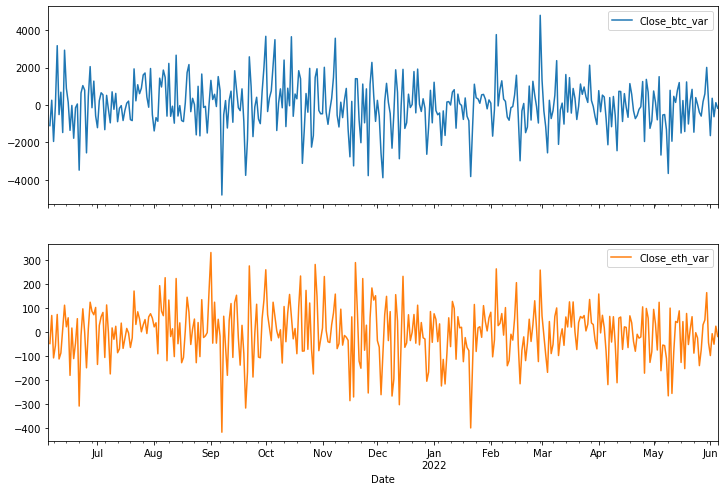

In [22]:
btc_eth[['Close_btc_var', 'Close_eth_var']].plot(subplots=True, figsize=(12, 8))

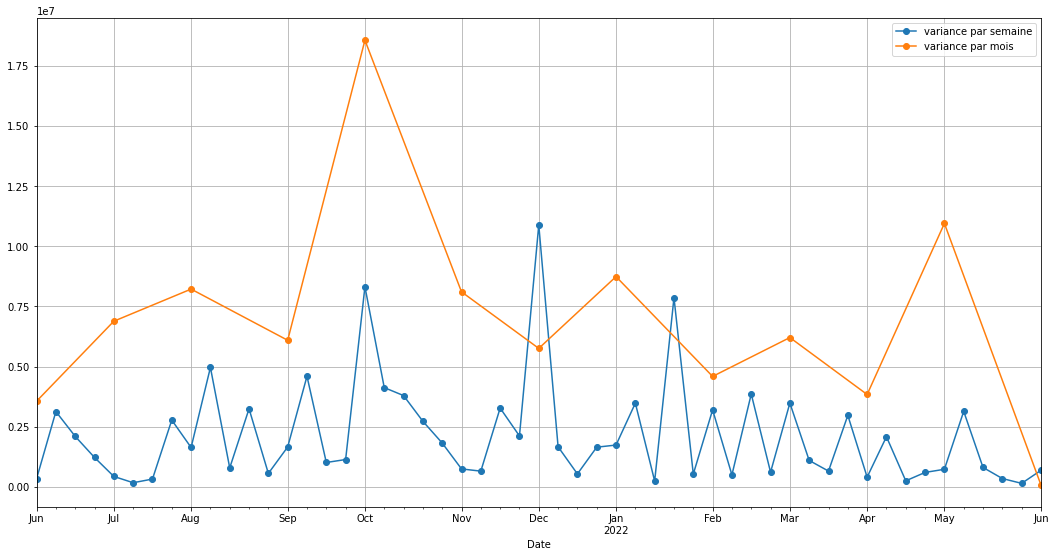

In [23]:
temporality = 'W'

m = btc['Close'].resample(temporality).agg(['var', 'std', 'min', 'max'])


plt.figure(figsize=(18, 9))

m['var'].plot(label='variance par semaine',marker='o')

btc['Close'].resample('M').var().plot(label='variance par mois',marker='o')

plt.legend()
plt.grid()
plt.show()

#### 2 échelles en comparaison

In [24]:
# Price au temps t / price initiale combien de % de victoire par rapport au lancement 
btc_return = btc.apply(lambda x: x / x[0])
btc_return.head()

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2021-06-04  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
2021-06-05  0.936989  0.963406  0.973178  0.963670   0.963670  0.859685   
2021-06-06  0.902958  0.925770  0.984637  0.972024   0.972024  0.691192   
2021-06-07  0.910439  0.935153  0.931754  0.907785   0.907785  0.803593   
2021-06-08  0.851644  0.862404  0.866677  0.906843   0.906843  1.192400   

            Close_var  
Date                   
2021-06-04        NaN  
2021-06-05        NaN  
2021-06-06        NaN  
2021-06-07        NaN  
2021-06-08        NaN

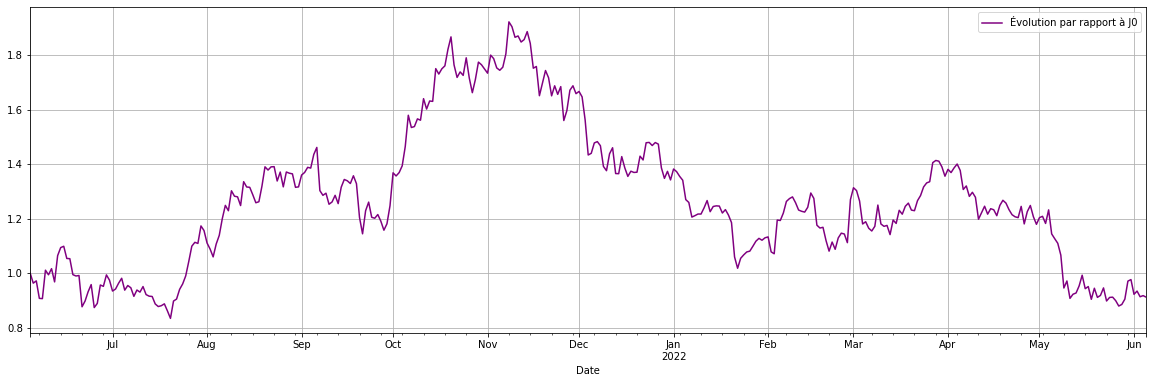

In [122]:
plt.figure(figsize=(20,6))
btc_return['Close'].plot(label='Évolution par rapport à J0',color='purple')
plt.grid()
plt.legend()

In [55]:
pd.set_option('display.max_row',None)
pd.set_option('display.max_columns',None)

### 30 derniers jours 

Ça : 

> **X - min(30 jours) / max(30jours)- min(30jours)**

Paquet de donnée par 30 jours 

In [61]:
from pandasql import sqldf

mysql = lambda q: sqldf(q, globals())

In [71]:
test_sql = btc['Close'].reset_index().rename(columns={'Date':'d_date','Close':'close'})

In [93]:
test_sql = mysql('''

SELECT  *,
        strftime('%m', d_date) AS month,
        strftime('%Y',d_date) as year

        FROM test_sql

''')

test_sql

d_date         close month  year month  year
0    2021-06-04 00:00:00.000000  30322.699219    06  2021    06  2021
1    2021-06-05 00:00:00.000000  29221.080078    06  2021    06  2021
2    2021-06-06 00:00:00.000000  29474.392578    06  2021    06  2021
3    2021-06-07 00:00:00.000000  27526.492188    06  2021    06  2021
4    2021-06-08 00:00:00.000000  27497.933594    06  2021    06  2021
5    2021-06-09 00:00:00.000000  30664.527344    06  2021    06  2021
6    2021-06-10 00:00:00.000000  30150.488281    06  2021    06  2021
7    2021-06-11 00:00:00.000000  30832.054688    06  2021    06  2021
8    2021-06-12 00:00:00.000000  29360.513672    06  2021    06  2021
9    2021-06-13 00:00:00.000000  32286.505859    06  2021    06  2021
10   2021-06-14 00:00:00.000000  33178.515625    06  2021    06  2021
11   2021-06-15 00:00:00.000000  33325.593750    06  2021    06  2021
12   2021-06-16 00:00:00.000000  31969.333984    06  2021    06  2021
13   2021-06-17 00:00:00.000000  31943.062500    06  2021    06  2021
14   2021-06-18 00:00:00.000000  30165.855469    06  2021    06  2021
15   2021-06-19 00:00:00.000000  30019.226562    06  2021    06  2021
16   2021-06-20 00:00:00.000000  30071.781250    06  2021    06  2021
17   2021-06-21 00:00:00.000000  26591.064453    06  2021    06  2021
18   2021-06-22 00:00:00.000000  27232.396484    06  2021    06  2021
19   2021-06-23 00:00:00.000000  28266.576172    06  2021    06  2021
20   2021-06-24 00:00:00.000000  29059.703125    06  2021    06  2021
21   2021-06-25 00:00:00.000000  26502.841797    06  2021    06  2021
22   2021-06-26 00:00:00.000000  26965.501953    06  2021    06  2021
23   2021-06-27 00:00:00.000000  29013.742188    06  2021    06  2021
24   2021-06-28 00:00:00.000000  28866.302734    06  2021    06  2021
25   2021-06-29 00:00:00.000000  30139.980469    06  2021    06  2021
26   2021-06-30 00:00:00.000000  29555.054688    06  2021    06  2021
27   2021-07-01 00:00:00.000000  28341.414062    07  2021    07  2021
28   2021-07-02 00:00:00.000000  28569.314453    07  2021    07  2021
29   2021-07-03 00:00:00.000000  29219.554688    07  2021    07  2021
30   2021-07-04 00:00:00.000000  29764.078125    07  2021    07  2021
31   2021-07-05 00:00:00.000000  28444.033203    07  2021    07  2021
32   2021-07-06 00:00:00.000000  28957.701172    07  2021    07  2021
33   2021-07-07 00:00:00.000000  28707.894531    07  2021    07  2021
34   2021-07-08 00:00:00.000000  27752.710938    07  2021    07  2021
35   2021-07-09 00:00:00.000000  28454.882812    07  2021    07  2021
36   2021-07-10 00:00:00.000000  28223.070312    07  2021    07  2021
37   2021-07-11 00:00:00.000000  28840.886719    07  2021    07  2021
38   2021-07-12 00:00:00.000000  27948.556641    07  2021    07  2021
39   2021-07-13 00:00:00.000000  27772.195312    07  2021    07  2021
40   2021-07-14 00:00:00.000000  27737.478516    07  2021    07  2021
41   2021-07-15 00:00:00.000000  26906.457031    07  2021    07  2021
42   2021-07-16 00:00:00.000000  26616.242188    07  2021    07  2021
43   2021-07-17 00:00:00.000000  26710.714844    07  2021    07  2021
44   2021-07-18 00:00:00.000000  26917.812500    07  2021    07  2021
45   2021-07-19 00:00:00.000000  26134.539062    07  2021    07  2021
46   2021-07-20 00:00:00.000000  25299.851562    07  2021    07  2021
47   2021-07-21 00:00:00.000000  27227.458984    07  2021    07  2021
48   2021-07-22 00:00:00.000000  27447.947266    07  2021    07  2021
49   2021-07-23 00:00:00.000000  28527.830078    07  2021    07  2021
50   2021-07-24 00:00:00.000000  29132.255859    07  2021    07  2021
51   2021-07-25 00:00:00.000000  30026.519531    07  2021    07  2021
52   2021-07-26 00:00:00.000000  31628.847656    07  2021    07  2021
53   2021-07-27 00:00:00.000000  33336.066406    07  2021    07  2021
54   2021-07-28 00:00:00.000000  33764.222656    07  2021    07  2021
55   2021-07-29 00:00:00.000000  33643.082031    07  2021    07  2021
56   2021-07-30 00:00:00.000000  35

In [90]:
query = '''

SELECT  
        max(close) as max_month,
        min(close) as min_month,
        strftime('%m', d_date) AS month,
        strftime('%Y',d_date) as year
    

FROM test_sql

GROUP BY 3,4

'''

peak = mysql(query)

peak

max_month     min_month month  year
0   41926.339844  30877.941406    01  2022
1   39255.910156  32490.472656    02  2022
2   42877.152344  34623.734375    03  2022
3   42480.390625  35770.070312    04  2022
4   37377.128906  26674.601562    05  2022
5   33325.593750  26502.841797    06  2021
6   28337.810547  27658.570312    06  2022
7   35590.078125  25299.851562    07  2021
8   42187.304688  32145.031250    08  2021
9   44329.070312  34712.968750    09  2021
10  56634.062500  41152.062500    10  2021
11  58305.039062  47323.101562    11  2021
12  50560.609375  40712.718750    12  2021

In [100]:
query='''

WITH join_tables AS (

SELECT * FROM test_sql 

         INNER JOIN peak ON test_sql.month = peak.month 
                         AND test_sql.year = peak.year

) 

SELECT *,
       (close-min_month)/(max_month-min_month) AS indicateur_stochastique

FROM join_tables 


'''


verif = mysql(query)

verif

d_date         close month  year     max_month  \
0    2021-06-04 00:00:00.000000  30322.699219    06  2021  33325.593750   
1    2021-06-05 00:00:00.000000  29221.080078    06  2021  33325.593750   
2    2021-06-06 00:00:00.000000  29474.392578    06  2021  33325.593750   
3    2021-06-07 00:00:00.000000  27526.492188    06  2021  33325.593750   
4    2021-06-08 00:00:00.000000  27497.933594    06  2021  33325.593750   
5    2021-06-09 00:00:00.000000  30664.527344    06  2021  33325.593750   
6    2021-06-10 00:00:00.000000  30150.488281    06  2021  33325.593750   
7    2021-06-11 00:00:00.000000  30832.054688    06  2021  33325.593750   
8    2021-06-12 00:00:00.000000  29360.513672    06  2021  33325.593750   
9    2021-06-13 00:00:00.000000  32286.505859    06  2021  33325.593750   
10   2021-06-14 00:00:00.000000  33178.515625    06  2021  33325.593750   
11   2021-06-15 00:00:00.000000  33325.593750    06  2021  33325.593750   
12   2021-06-16 00:00:00.000000  31969.333984    06  2021  33325.593750   
13   2021-06-17 00:00:00.000000  31943.062500    06  2021  33325.593750   
14   2021-06-18 00:00:00.000000  30165.855469    06  2021  33325.593750   
15   2021-06-19 00:00:00.000000  30019.226562    06  2021  33325.593750   
16   2021-06-20 00:00:00.000000  30071.781250    06  2021  33325.593750   
17   2021-06-21 00:00:00.000000  26591.064453    06  2021  33325.593750   
18   2021-06-22 00:00:00.000000  27232.396484    06  2021  33325.593750   
19   2021-06-23 00:00:00.000000  28266.576172    06  2021  33325.593750   
20   2021-06-24 00:00:00.000000  29059.703125    06  2021  33325.593750   
21   2021-06-25 00:00:00.000000  26502.841797    06  2021  33325.593750   
22   2021-06-26 00:00:00.000000  26965.501953    06  2021  33325.593750   
23   2021-06-27 00:00:00.000000  29013.742188    06  2021  33325.593750   
24   2021-06-28 00:00:00.000000  28866.302734    06  2021  33325.593750   
25   2021-06-29 00:00:00.000000  30139.980469    06  2021  33325.593750   
26   2021-06-30 00:00:00.000000  29555.054688    06  2021  33325.593750   
27   2021-07-01 00:00:00.000000  28341.414062    07  2021  35590.078125   
28   2021-07-02 00:00:00.000000  28569.314453    07  2021  35590.078125   
29   2021-07-03 00:00:00.000000  29219.554688    07  2021  35590.078125   
30   2021-07-04 00:00:00.000000  29764.078125    07  2021  35590.078125   
31   2021-07-05 00:00:00.000000  28444.033203    07  2021  35590.078125   
32   2021-07-06 00:00:00.000000  28957.701172    07  2021  35590.078125   
33   2021-07-07 00:00:00.000000  28707.894531    07  2021  35590.078125   
34   2021-07-08 00:00:00.000000  27752.710938    07  2021  35590.078125   
35   2021-07-09 00:00:00.000000  28454.882812    07  2021  35590.078125   
36   2021-07-10 00:00:00.000000  28223.070312    07  2021  35590.078125   
37   2021-07-11 00:00:00.000000  28840.886719    07  2021  35590.078125   
38   2021-07-12 00:00:00.000000  27948.556641    07  2021  35590.078125   
39   2021-07-13 00:00:00.000000  27772.195312    07  2021  35590.078125   
40   2021-07-14 00:00:00.000000  27737.478516    07  2021  35590.078125   
41   2021-07-15 00:00:00.000000  26906.457031    07  2021  35590.078125   
42   2021-07-16 00:00:00.000000  26616.242188    07  2021  35590.078125   
43   2021-07-17 00:00:00.000000  26710.714844    07  2021  35590.078125   
44   2021-07-18 00:00:00.000000  26917.812500    07  2021  35590.078125   
45   2021-07-19 00:00:00.000000  26134.539062    07  2021  35590.078125   
46   2021-07-20 00:00:00.000000  25299.851562    07  2021  35590.078125   
47   2021-07-21 00:00:00.000000  27227.458984    07  2021  35590.078125   
48   2021-07-22 00:00:00.000000  27447.947266    07  2021  35590.078125   
49   2021-07-23 00:00:00.000000  28527.830078    07  2021  35590.078125   
50   2021-07-24 00:00:00.000000  29132.255859    07  2021  35590.078125   
51   2021-07-25 00:00:00.000000  30026.519531    07  2021  35590.078125   
52   2021-07-26 00:00:00.000000  31628.847656    0

In [108]:
verif.groupby('d_date').month.min()

d_date
2021-06-04 00:00:00.000000    06
2021-06-05 00:00:00.000000    06
2021-06-06 00:00:00.000000    06
2021-06-07 00:00:00.000000    06
2021-06-08 00:00:00.000000    06
2021-06-09 00:00:00.000000    06
2021-06-10 00:00:00.000000    06
2021-06-11 00:00:00.000000    06
2021-06-12 00:00:00.000000    06
2021-06-13 00:00:00.000000    06
2021-06-14 00:00:00.000000    06
2021-06-15 00:00:00.000000    06
2021-06-16 00:00:00.000000    06
2021-06-17 00:00:00.000000    06
2021-06-18 00:00:00.000000    06
2021-06-19 00:00:00.000000    06
2021-06-20 00:00:00.000000    06
2021-06-21 00:00:00.000000    06
2021-06-22 00:00:00.000000    06
2021-06-23 00:00:00.000000    06
2021-06-24 00:00:00.000000    06
2021-06-25 00:00:00.000000    06
2021-06-26 00:00:00.000000    06
2021-06-27 00:00:00.000000    06
2021-06-28 00:00:00.000000    06
2021-06-29 00:00:00.000000    06
2021-06-30 00:00:00.000000    06
2021-07-01 00:00:00.000000    07
2021-07-02 00:00:00.000000    07
2021-07-03 00:00:00.000000    07
202

In [112]:
verif['d_date']

0      2021-06-04 00:00:00.000000
1      2021-06-05 00:00:00.000000
2      2021-06-06 00:00:00.000000
3      2021-06-07 00:00:00.000000
4      2021-06-08 00:00:00.000000
5      2021-06-09 00:00:00.000000
6      2021-06-10 00:00:00.000000
7      2021-06-11 00:00:00.000000
8      2021-06-12 00:00:00.000000
9      2021-06-13 00:00:00.000000
10     2021-06-14 00:00:00.000000
11     2021-06-15 00:00:00.000000
12     2021-06-16 00:00:00.000000
13     2021-06-17 00:00:00.000000
14     2021-06-18 00:00:00.000000
15     2021-06-19 00:00:00.000000
16     2021-06-20 00:00:00.000000
17     2021-06-21 00:00:00.000000
18     2021-06-22 00:00:00.000000
19     2021-06-23 00:00:00.000000
20     2021-06-24 00:00:00.000000
21     2021-06-25 00:00:00.000000
22     2021-06-26 00:00:00.000000
23     2021-06-27 00:00:00.000000
24     2021-06-28 00:00:00.000000
25     2021-06-29 00:00:00.000000
26     2021-06-30 00:00:00.000000
27     2021-07-01 00:00:00.000000
28     2021-07-02 00:00:00.000000
29     2021-07

### Process de vérification

In [102]:
query='''

SELECT indicateur_stochastique, 
       count(indicateur_stochastique)


FROM verif
GROUP BY 1
ORDER BY 1



'''


verif2 = mysql(query)

verif2

indicateur_stochastique  count(indicateur_stochastique)
0                   0.000000                              13
1                   0.006636                               1
2                   0.012931                               1
3                   0.016309                               1
4                   0.017509                               1
5                   0.022588                               1
6                   0.024252                               1
7                   0.031379                               1
8                   0.039790                               1
9                   0.041687                               1
10                  0.043304                               1
11                  0.048931                               1
12                  0.052512                               1
13                  0.055514                               1
14                  0.067811                               1
15                  0.069898                               1
16                  0.070347                               1
17                  0.071825                               1
18                  0.071951                               1
19                  0.072808                               1
20                  0.073666                               1
21                  0.074155                               1
22                  0.079648                               1
23                  0.081115                               1
24                  0.084237                               1
25                  0.084310                               1
26                  0.085933                               1
27                  0.086632                               1
28                  0.087044                               1
29                  0.089312                               1
30                  0.089951                               1
31                  0.092264                               1
32                  0.096894                               1
33                  0.098265                               1
34                  0.100174                               1
35                  0.100365                               1
36                  0.104303                               1
37                  0.106930                               1
38                  0.110422                               1
39                  0.110768                               1
40                  0.111731                               1
41                  0.111750                               1
42                  0.113854                               1
43                  0.116035                               1
44                  0.122762                               1
45                  0.123854                               1
46                  0.124705                               1
47                  0.126491                               1
48                  0.127926                               1
49                  0.134987                               1
50                  0.135488                               1
51                  0.136351                               1
52                  0.137107                               1
53                  0.137305                               1
54                  0.142513                               1
55                  0.142911                               1
56                  0.143328                               1
57                  0.143611                               1
58                  0.145490                               1
59                  0.145849                               1
60                  0.150035                               1
61                  0.151006                               1
62                  0.152180                               1
63                  0.153931                               1
64                  0.156129            

In [56]:
btc['Close'].rolling(window=30).max()

Date
2021-06-04             NaN
2021-06-05             NaN
2021-06-06             NaN
2021-06-07             NaN
2021-06-08             NaN
2021-06-09             NaN
2021-06-10             NaN
2021-06-11             NaN
2021-06-12             NaN
2021-06-13             NaN
2021-06-14             NaN
2021-06-15             NaN
2021-06-16             NaN
2021-06-17             NaN
2021-06-18             NaN
2021-06-19             NaN
2021-06-20             NaN
2021-06-21             NaN
2021-06-22             NaN
2021-06-23             NaN
2021-06-24             NaN
2021-06-25             NaN
2021-06-26             NaN
2021-06-27             NaN
2021-06-28             NaN
2021-06-29             NaN
2021-06-30             NaN
2021-07-01             NaN
2021-07-02             NaN
2021-07-03    29544.450130
2021-07-04    29525.829427
2021-07-05    29499.927865
2021-07-06    29482.704818
2021-07-07    29522.084896
2021-07-08    29530.577474
2021-07-09    29456.922656
2021-07-10    29392.675

<AxesSubplot:xlabel='Date'>

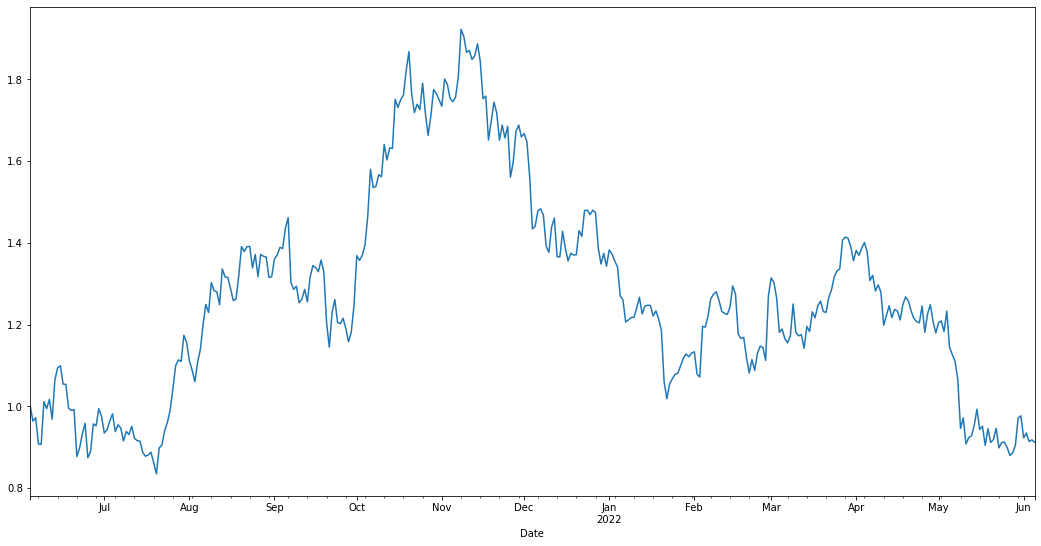

In [25]:
btc_return['Close'].plot(figsize=(18,9))

In [26]:
btc_rtv =  btc.pct_change()

btc_rtv

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2021-06-04       NaN       NaN       NaN       NaN        NaN       NaN   
2021-06-05 -0.063011 -0.036594 -0.026822 -0.036330  -0.036330 -0.140315   
2021-06-06 -0.036320 -0.039066  0.011775  0.008669   0.008669 -0.195994   
2021-06-07  0.008285  0.010136 -0.053708 -0.066088  -0.066088  0.162618   
2021-06-08 -0.064579 -0.077794 -0.069844 -0.001037  -0.001037  0.483836   
...              ...       ...       ...       ...        ...       ...   
2022-06-01  0.005796 -0.008573 -0.052947 -0.055271  -0.055271  0.236251   
2022-06-02 -0.055411 -0.044155  0.004381  0.012799   0.012799 -0.299647   
2022-06-03  0.012952 -0.000061 -0.015106 -0.022192  -0.022192 -0.097353   
2022-06-04 -0.022145 -0.019281  0.004277  0.004434   0.004434 -0.366197   
2022-06-05  0.004489 -0.002035  0.002909 -0.006225  -0.006225 -0.035176   

            Close_var  
Date                   
2021-06-04        NaN  
2021-06-05        NaN  
2021-06-06  -1.229946  
2021-06-07  -8.689713  
2021-06-08  -0.985339  
...               ...  
2022-06-01 -10.737676  
2022-06-02  -1.218770  
2022-06-03  -2.756067  
2022-06-04  -1.195387  
2022-06-05  -2.409928  

[367 rows x 7 columns]

In [27]:
btc_diff =  btc.diff()

btc_diff

Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-06-04          NaN          NaN          NaN          NaN          NaN   
2021-06-05 -2038.359375 -1183.792969  -790.601562 -1101.619141 -1101.619141   
2021-06-06 -1100.880859 -1217.513672   337.773438   253.312500   253.312500   
2021-06-07   242.001953   303.558594 -1558.791016 -1947.900391 -1947.900391   
2021-06-08 -1901.984375 -2353.394531 -1918.244141   -28.558594   -28.558594   
...                 ...          ...          ...          ...          ...   
2022-06-01   170.673828  -257.601562 -1548.625000 -1636.937500 -1636.937500   
2022-06-02 -1641.097656 -1315.345703   121.367188   358.113281   358.113281   
2022-06-03   362.343750    -1.732422  -420.269531  -628.871094  -628.871094   
2022-06-04  -627.537109  -548.960938   117.201172   122.873047   122.873047   
2022-06-05   124.392578   -56.816406    80.056641  -173.242188  -173.242188   

                  Volume    Close_var  
Date                                   
2021-06-04           NaN          NaN  
2021-06-05 -4.824027e+09          NaN  
2021-06-06 -5.792792e+09  1354.931641  
2021-06-07  3.864331e+09 -2201.212891  
2021-06-08  1.336722e+10  1919.341797  
...                  ...          ...  
2022-06-01  7.381213e+09 -1805.041016  
2022-06-02 -1.157365e+10  1995.050781  
2022-06-03 -2.633468e+09  -986.984375  
2022-06-04 -8.941480e+09   751.744141  
2022-06-05 -5.443755e+08  -296.115234  

[367 rows x 7 columns]

## Indicateur stochastique prochee de 100% si la cloture est proche de son point le plus haut historiquement 
 
btc['indicateur_stochastique']=(btc['Close']-min(btc['Close']))/(max(btc['Close'])-min(btc['Close']))*100

btc['indicateur_stochastique'].tail()

In [50]:
 btc['Close'].resample('M').var()

Date
2021-06-30    3.559122e+06
2021-07-31    6.886960e+06
2021-08-31    8.223042e+06
2021-09-30    6.093994e+06
2021-10-31    1.857770e+07
2021-11-30    8.108099e+06
2021-12-31    5.755811e+06
2022-01-31    8.742053e+06
2022-02-28    4.590129e+06
2022-03-31    6.207078e+06
2022-04-30    3.838004e+06
2022-05-31    1.095465e+07
2022-06-30    7.435376e+04
Freq: M, Name: Close, dtype: float64

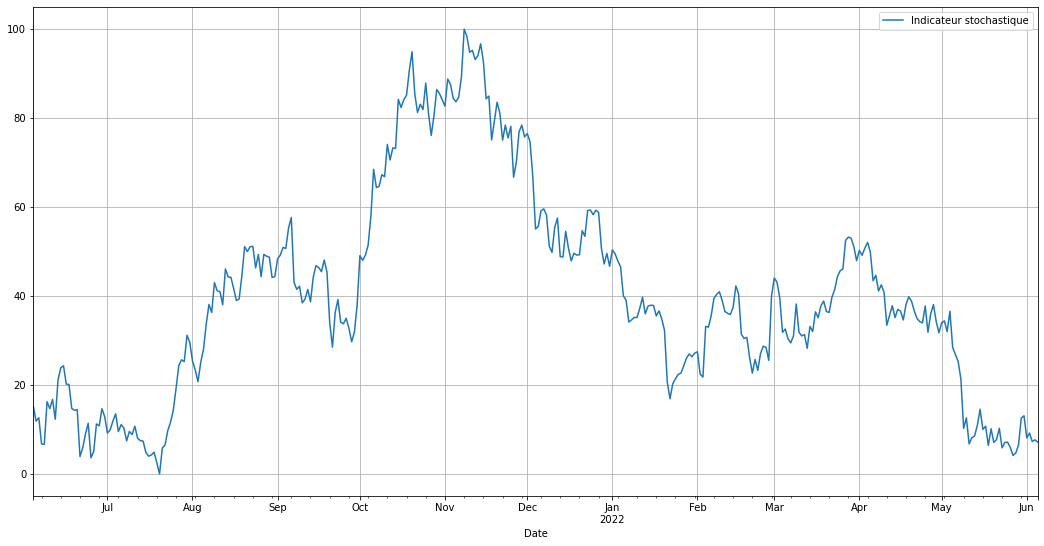

In [29]:
btc['indicateur_stochastique'].plot(figsize=(18,9),label='Indicateur stochastique')

plt.legend()
plt.grid()

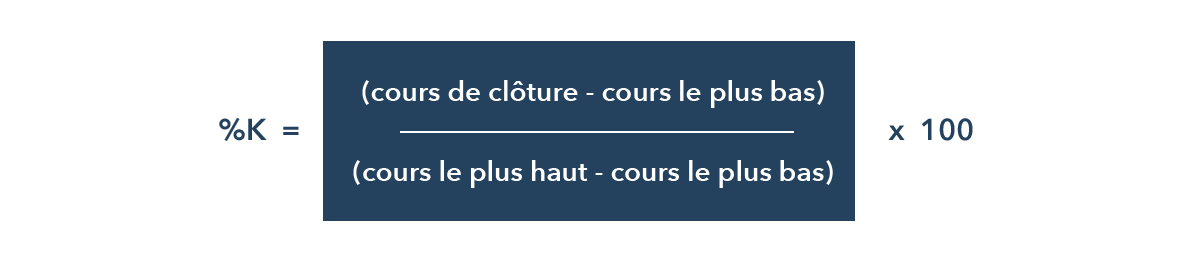

##### AIRE créer une loi une probabilité
 >Le but de la variable aléatoire c'est de déterminer l'aire future entre la ligne actuelle et le max 
 grace à cela on visualise **l'évolution du cours** 

<AxesSubplot:xlabel='Date'>

<Figure size 1296x648 with 0 Axes>

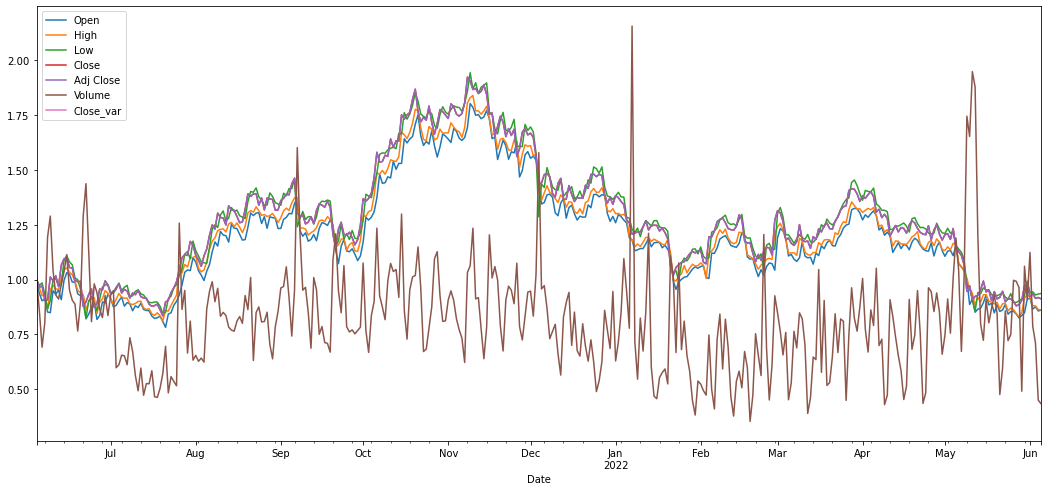

In [30]:
plt.figure(figsize =(18,9))
btc_return.plot(figsize =(18,8))

In [31]:
import numpy as np

data = btc.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [32]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=8).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=8).min()

# si il est plus haut que le max des 8 derniers jours on achète 

# si il est plus bas que  le min des 8 derniers jours on vend 

data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

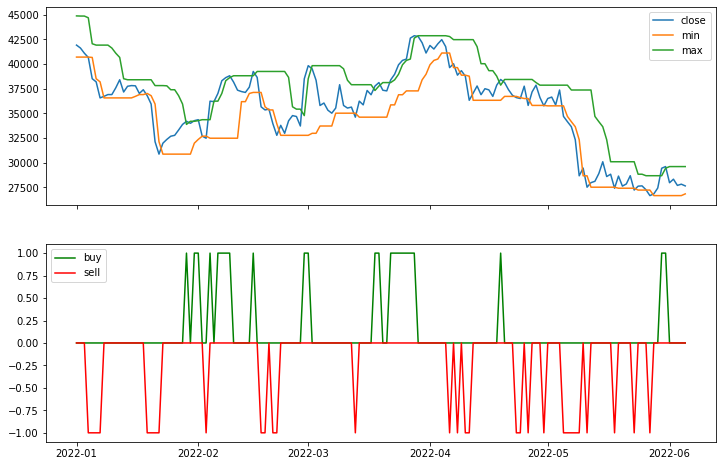

In [33]:
start ='2022'
end='2022'

fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
# plt.figure(figsize=(12, 8))
# plt.subplot(211)

ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])

In [34]:
data.head()

Open          High           Low         Close  \
Date                                                                 
2021-06-04  32349.347656  32349.347656  29476.158203  30322.699219   
2021-06-05  30310.988281  31165.554688  28685.556641  29221.080078   
2021-06-06  29210.107422  29948.041016  29023.330078  29474.392578   
2021-06-07  29452.109375  30251.599609  27464.539062  27526.492188   
2021-06-08  27550.125000  27898.205078  25546.294922  27497.933594   

               Adj Close       Volume    Close_var  indicateur_stochastique  \
Date                                                                          
2021-06-04  30322.699219  34380052740          NaN                15.218358   
2021-06-05  29221.080078  29556026133 -1101.619141                11.880643   
2021-06-06  29474.392578  23763233981   253.312500                12.648136   
2021-06-07  27526.492188  27627564851 -1947.900391                 6.746335   
2021-06-08  27497.933594  40994783948   -28.558594                 6.659808   

            Buy  Sell  RollingMax  RollingMin  
Date                                           
2021-06-04  0.0   0.0         NaN         NaN  
2021-06-05  0.0   0.0         NaN         NaN  
2021-06-06  0.0   0.0         NaN         NaN  
2021-06-07  0.0   0.0         NaN         NaN  
2021-06-08  0.0   0.0         NaN         NaN